In [1]:
import pandas as pd
import numpy as np
from IPython.display import Math #para escrever equações 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import seaborn as sns

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [3]:
from random import randint
from xmlrpc.client import Boolean
from tqdm import tqdm
import pandas as pd
import numpy as np
import quantecon as qe

import logging
log = logging.getLogger(__name__)
logging.basicConfig(level=logging.DEBUG) 


In [4]:
RANDOM_SIZE   = 1000000
RANDOM_SIZE   = 1003
# QTD_BINS      = 3
TEST_SIZE     = 0.05
RANDOM_STATE  = 2022

- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_commodity_types.csv
- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_vegetable_oil.csv
- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_full.csv

# Mercado de Oleo

## Dataset Completo
USDA por comodity
USDA Agrupado por Oleo Vegetal
OECD Agrupado
FAO Index Price


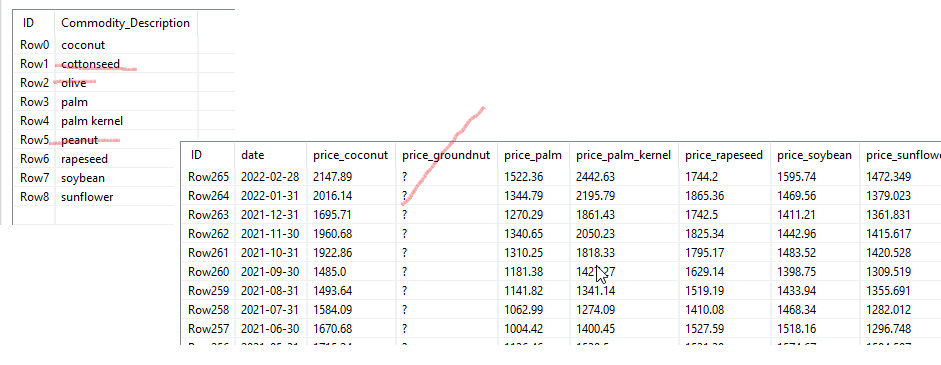

In [5]:

def get_dataset():
    df = pd.read_csv('https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_full.csv')
    print(df.shape)
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by=['date'], ascending=[True], inplace=True)
    df.set_index(['date'], inplace=True)
    return df

%time df_full = get_dataset()
df_full.head()

(266, 139)
CPU times: total: 78.1 ms
Wall time: 724 ms


reference  price_index_fao  coconut_beginning_stocks  \
date                                                              
2000-01-31       NaN           48.583                       NaN   
2000-02-29       NaN           46.368                       NaN   
2000-03-31       NaN           47.819                       NaN   
2000-04-30       NaN           49.499                       NaN   
2000-05-31       NaN           44.489                       NaN   

            coconut_crush  coconut_domestic_consumption  \
date                                                      
2000-01-31            NaN                           NaN   
2000-02-29            NaN                           NaN   
2000-03-31            NaN                           NaN   
2000-04-30            NaN                           NaN   
2000-05-31            NaN                           NaN   

            coconut_ending_stocks  coconut_exports  \
date                                                 
2000-01-31                    NaN              NaN   
2000-02-29                    NaN              NaN   
2000-03-31                    NaN              NaN   
2000-04-30                    NaN              NaN   
2000-05-31                    NaN              NaN   

            coconut_feed_waste_dom_cons  coconut_food_use_dom_cons  \
date                                                                 
2000-01-31                          NaN                        NaN   
2000-02-29                          NaN                        NaN   
2000-03-31                          NaN                        NaN   
2000-04-30                          NaN                        NaN   
2000-05-31                          NaN                        NaN   

            coconut_imports  ...  palm_kernel_domestic_consumption  \
date                         ...                                     
2000-01-31              NaN  ...                               NaN   
2000-02-29              NaN  ...                               NaN   
2000-03-31              NaN  ...                               NaN   
2000-04-30              NaN  ...                               NaN   
2000-05-31              NaN  ...                               NaN   

            palm_kernel_ending_stocks  palm_kernel_exports  \
date                                                         
2000-01-31                        NaN                  NaN   
2000-02-29                        NaN                  NaN   
2000-03-31                        NaN                  NaN   
2000-04-30                        NaN                  NaN   
2000-05-31                        NaN                  NaN   

            palm_kernel_feed_waste_dom_cons  palm_kernel_food_use_dom_cons  \
date                                                                         
2000-01-31                              NaN                            NaN   
2000-02-29                              NaN                            NaN   
2000-03-31                              NaN                            NaN   
2000-04-30                              NaN                            NaN   
2000-05-31                              NaN                            NaN   

            palm_kernel_imports  palm_kernel_industrial_dom_cons  \
date                                                               
2000-01-31                  NaN                              NaN   
2000-02-29                  NaN                              NaN   
2000-03-31                  NaN                              NaN   
2000-04-30                  NaN                              NaN   
2000-05-31                  NaN                              NaN   

            palm_kernel_production  palm_kernel_total_distribution  \
date                                                                 
2000-01-31                     NaN                             NaN   
2000-02-29                     NaN                             NaN   
2000-03-31                 

In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2000-01-31 to 2022-02-28
Columns: 138 entries, reference to palm_kernel_total_supply
dtypes: float64(137), object(1)
memory usage: 288.9+ KB


In [7]:
df_full.dtypes

reference                           object
price_index_fao                    float64
coconut_beginning_stocks           float64
coconut_crush                      float64
coconut_domestic_consumption       float64
                                    ...   
palm_kernel_imports                float64
palm_kernel_industrial_dom_cons    float64
palm_kernel_production             float64
palm_kernel_total_distribution     float64
palm_kernel_total_supply           float64
Length: 138, dtype: object

In [8]:
features = [x for x in df_full.columns if ('exports' in x or 'production' in x or 'price' in x) and not ('olive' in x or 'cottonseed' in x) ]
prices = [x for x in df_full.columns if 'price' in x and 'groundnut' not in x  ]
print(len(features), features)
print(len(prices), prices)

26 ['price_index_fao', 'coconut_exports', 'coconut_price', 'coconut_production', 'palm kernel_price', 'palm_exports', 'palm_price', 'palm_production', 'peanut_exports', 'peanut_price', 'peanut_production', 'rapeseed_exports', 'rapeseed_price', 'rapeseed_production', 'soybean_exports', 'soybean_price', 'soybean_production', 'sunflower_exports', 'sunflower_price', 'sunflower_production', 'vegetable_oil_exports_usda', 'vegetable_oil_production_usda', 'vegetable_oils_exports_oecd', 'vegetable_oils_production_oecd', 'palm_kernel_exports', 'palm_kernel_production']
8 ['price_index_fao', 'coconut_price', 'palm kernel_price', 'palm_price', 'peanut_price', 'rapeseed_price', 'soybean_price', 'sunflower_price']


In [9]:
df = df_full[features]
print(df.shape)
df = df[df['sunflower_production'].notnull()]
df = df[df['sunflower_price'].notnull()]
print(df.shape)
df

(266, 26)
(234, 26)


price_index_fao  coconut_exports  coconut_price  \
date                                                          
2002-02-28           47.786          148.440        376.000   
2002-03-31           47.622          148.040        366.000   
2002-04-30           48.969          147.640        411.000   
2002-05-31           51.641          147.240        420.000   
2002-06-30           55.804          146.830        446.000   
...                     ...              ...            ...   
2021-08-31          165.862          157.080       1493.640   
2021-09-30          168.571          158.080       1485.000   
2021-10-31          184.837          159.080       1922.860   
2021-11-30          184.555          160.080       1960.680   
2021-12-31          178.505          161.080       1695.710   

            coconut_production  palm kernel_price  palm_exports  palm_price  \
date                                                                          
2002-02-28             255.940            356.000      1527.920     352.980   
2002-03-31             255.830            353.240      1543.880     359.000   
2002-04-30             255.720            405.000      1559.830     360.070   
2002-05-31             255.610            418.300      1575.790     384.910   
2002-06-30             255.500            439.000      1591.750     426.130   
...                        ...                ...           ...         ...   
2021-08-31             290.610           1341.140      4092.220    1141.820   
2021-09-30             291.080           1427.270      4103.190    1181.380   
2021-10-31             291.560           1818.330      4114.150    1310.250   
2021-11-30             292.030           2050.230      4125.120    1340.650   
2021-12-31             292.500           1861.430      4136.080    1270.290   

            palm_production  peanut_exports  peanut_price  ...  \
date                                                       ...   
2002-02-28         2146.310          17.030       617.290  ...   
2002-03-31         2162.830          16.580       598.920  ...   
2002-04-30         2179.360          16.140       590.240  ...   
2002-05-31         2195.890          15.690       599.560  ...   
2002-06-30         2212.420          15.250       645.950  ...   
...                     ...             ...           ...  ...   
2021-08-31         6229.440          35.640           NaN  ...   
2021-09-30         6246.960          35.020           NaN  ...   
2021-10-31         6264.470          34.400           NaN  ...   
2021-11-30         6281.990          33.780           NaN  ...   
2021-12-31         6299.500          33.170           NaN  ...   

            soybean_production  sunflower_exports  sunflower_price  \
date                                                                 
2002-02-28            3204.320            166.180          578.000   
2002-03-31            3222.400            168.850          557.000   
2002-04-30            3240.470            171.530          552.000   
2002-05-31            3258.550            174.200          574.000   
2002-06-30            3276.620            176.880          595.000   
...                        ...                ...              ...   
2021-08-31            6354.170            988.220         1355.691   
2021-09-30            6350.750            994.670         1309.519   
2021-10-31            6347.330           1001.110         1420.528   
2021-11-30            6343.920           1007.560         1415.617   
2021-12-31            6340.500           1014.000         1361.831   

            sunflower_production  vegetable_oil_exports_usda  \
date                                                           
2002-02-28               620.920                    3312.180   
2002-03-31               625.580                    3339.800   
2002-04-30               630.250                    3367.440   
2002-05-31               634.920                    3395.080   
2002-06-30

In [10]:
df.describe()

price_index_fao  coconut_exports  coconut_price  coconut_production  \
count          234.000          234.000        234.000             234.000   
mean           103.046          154.793       1037.208             277.760   
std             32.741           10.334        412.612              12.313   
min             47.622          123.000        366.000             248.500   
25%             78.436          148.055        702.250             270.998   
50%             97.910          154.895        953.500             275.410   
75%            121.403          160.400       1387.287             287.767   
max            184.837          177.920       2256.000             302.500   

       palm kernel_price  palm_exports  palm_price  palm_production  \
count            234.000       234.000     234.000          234.000   
mean             956.092      3226.635     763.075         4406.418   
std              378.930       805.918     244.906         1262.844   
min              353.240      1527.920     352.980         2146.310   
25%              655.290      2515.020     577.495         3275.315   
50%              878.330      3399.860     732.000         4468.605   
75%             1232.705      4014.682     886.188         5503.118   
max             2307.630      4325.500    1377.220         6299.500   

       peanut_exports  peanut_price  ...  soybean_production  \
count         234.000       221.000  ...             234.000   
mean           19.901      1483.936  ...            4857.446   
std             6.470       383.791  ...             980.073   
min            12.830       590.240  ...            3204.320   
25%            15.468      1287.500  ...            4057.825   
50%            16.805      1404.950  ...            4667.785   
75%            23.133      1633.340  ...            5831.602   
max            40.580      2502.250  ...            6381.500   

       sunflower_exports  sunflower_price  sunflower_production  \
count            234.000          234.000               234.000   
mean             563.021          966.043              1174.819   
std              284.888          334.951               331.668   
min              166.180          543.000               620.920   
25%              329.412          719.643               886.732   
50%              493.780          856.470              1127.385   
75%              867.900         1174.505              1528.378   
max             1122.670         2045.000              1761.580   

       vegetable_oil_exports_usda  vegetable_oil_production_usda  \
count                     234.000                        234.000   
mean                     5990.575                      14277.728   
std                      1329.965                       3166.837   
min                      3312.180                       8559.630   
25%                      5027.562                      11538.903   
50%                      5927.510                      14325.960   
75%                      7278.573                      17158.577   
max                      7887.340                      19012.500   

       vegetable_oils_exports_oecd  vegetable_oils_production_oecd  \
count                      234.000                         234.000   
mean                      5545.769                       13471.372   
std                       1307.176                        3118.232   
min                       2986.310                        7954.130   
25%                       4463.065                       10815.903   
50%                       5663.720                       13418.630   
75%                       6772.868                       16394.708   
max                       7349.260                       18307.580   

       palm_kernel_exports  palm_kernel_production  
count              234.000                 234.000  
mean               233.840                 523.365  
std                 41.691                 139.269  
min                130.470 

## Correlação

Paired density and scatterplot matrix

https://seaborn.pydata.org/examples/pair_grid_with_kde.html

In [11]:
if False:
    %time
    sns.set_theme(style="white")

    g = sns.PairGrid(df, diag_sharey=False)
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=2)

![Alt text](https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/images/Compare.png)

## Dendograma

In [12]:
if False:
    plt.figure(figsize=(25,10))
    dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

    plt.title('Dendrogram')

    # plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    %time plt.show()

# Markov

In [13]:
!pip install --upgrade quantecon numba tqdm

In [14]:
df.tail()

price_index_fao  coconut_exports  coconut_price  \
date                                                          
2021-08-31          165.862          157.080       1493.640   
2021-09-30          168.571          158.080       1485.000   
2021-10-31          184.837          159.080       1922.860   
2021-11-30          184.555          160.080       1960.680   
2021-12-31          178.505          161.080       1695.710   

            coconut_production  palm kernel_price  palm_exports  palm_price  \
date                                                                          
2021-08-31             290.610           1341.140      4092.220    1141.820   
2021-09-30             291.080           1427.270      4103.190    1181.380   
2021-10-31             291.560           1818.330      4114.150    1310.250   
2021-11-30             292.030           2050.230      4125.120    1340.650   
2021-12-31             292.500           1861.430      4136.080    1270.290   

            palm_production  peanut_exports  peanut_price  ...  \
date                                                       ...   
2021-08-31         6229.440          35.640           NaN  ...   
2021-09-30         6246.960          35.020           NaN  ...   
2021-10-31         6264.470          34.400           NaN  ...   
2021-11-30         6281.990          33.780           NaN  ...   
2021-12-31         6299.500          33.170           NaN  ...   

            soybean_production  sunflower_exports  sunflower_price  \
date                                                                 
2021-08-31            6354.170            988.220         1355.691   
2021-09-30            6350.750            994.670         1309.519   
2021-10-31            6347.330           1001.110         1420.528   
2021-11-30            6343.920           1007.560         1415.617   
2021-12-31            6340.500           1014.000         1361.831   

            sunflower_production  vegetable_oil_exports_usda  \
date                                                           
2021-08-31              1703.690                    7821.270   
2021-09-30              1717.600                    7837.790   
2021-10-31              1731.510                    7854.300   
2021-11-30              1745.420                    7870.820   
2021-12-31              1759.330                    7887.340   

            vegetable_oil_production_usda  vegetable_oils_exports_oecd  \
date                                                                     
2021-08-31                      18894.320                     7325.470   
2021-09-30                      18923.870                     7328.510   
2021-10-31                      18953.420                     7331.560   
2021-11-30                      18982.970                     7334.600   
2021-12-31                      19012.500                     7337.650   

            vegetable_oils_production_oecd  palm_kernel_exports  \
date                                                              
2021-08-31                       18174.560              276.780   
2021-09-30                       18207.820              278.380   
2021-10-31                       18241.070              279.970   
2021-11-30                       18274.330              281.570   
2021-12-31                       18307.580              283.170   

            palm_kernel_production  
date                                
2021-08-31                 716.470  
2021-09-30                 718.600  
2021-10-31                 720.740  
2021-11-30                 722.870  
2021-12-31                 725.000  

[5 rows x 26 columns]

## Geração do Random Sets

In [15]:
def prepare_dataset(df: pd.DataFrame):
    df = df.copy()
    for col in df.columns:
        df[f'{col}_delta']    = df[col].diff()
        df[f'{col}_outcome']  = df[col].diff(-1) * -1
        df[f'{col}_mom']      = df[col].pct_change()

    columns = sorted(list(df.columns))
    return df[columns].reset_index()


df_m = prepare_dataset(df)
df_m.tail(10).T

224  \
date                                    2021-03-31 00:00:00   
coconut_exports                                     152.080   
coconut_exports_delta                                 1.000   
coconut_exports_mom                                   0.007   
coconut_exports_outcome                               1.000   
...                                                     ...   
vegetable_oils_exports_oecd_outcome                   3.050   
vegetable_oils_production_oecd                    18008.290   
vegetable_oils_production_oecd_delta                 33.250   
vegetable_oils_production_oecd_mom                    0.002   
vegetable_oils_production_oecd_outcome               33.260   

                                                        225  \
date                                    2021-04-30 00:00:00   
coconut_exports                                     153.080   
coconut_exports_delta                                 1.000   
coconut_exports_mom                                   0.007   
coconut_exports_outcome                               1.000   
...                                                     ...   
vegetable_oils_exports_oecd_outcome                   3.040   
vegetable_oils_production_oecd                    18041.550   
vegetable_oils_production_oecd_delta                 33.260   
vegetable_oils_production_oecd_mom                    0.002   
vegetable_oils_production_oecd_outcome               33.250   

                                                        226  \
date                                    2021-05-31 00:00:00   
coconut_exports                                     154.080   
coconut_exports_delta                                 1.000   
coconut_exports_mom                                   0.007   
coconut_exports_outcome                               1.000   
...                                                     ...   
vegetable_oils_exports_oecd_outcome                   3.050   
vegetable_oils_production_oecd                    18074.800   
vegetable_oils_production_oecd_delta                 33.250   
vegetable_oils_production_oecd_mom                    0.002   
vegetable_oils_production_oecd_outcome               33.260   

                                                        227  \
date                                    2021-06-30 00:00:00   
coconut_exports                                     155.080   
coconut_exports_delta                                 1.000   
coconut_exports_mom                                   0.006   
coconut_exports_outcome                               1.000   
...                                                     ...   
vegetable_oils_exports_oecd_outcome                   3.040   
vegetable_oils_production_oecd                    18108.060   
vegetable_oils_production_oecd_delta                 33.260   
vegetable_oils_production_oecd_mom                    0.002   
vegetable_oils_production_oecd_outcome               33.250   

                                                        228  \
date                                    2021-07-31 00:00:00   
coconut_exports                                     156.080   
coconut_exports_delta                                 1.000   
coconut_exports_mom                                   0.006   
coconut_exports_outcome                               1.000   
...                                                     ...   
vegetable_oils_exports_oecd_outcome                   3.050   
vegetable_oils_production_oecd                    18141.310   
vegetable_oils_production_oecd_delta                 33.250   
vegetable_oils_production_oecd_mom                    0.002   
vegetable_oils_production_oecd_outcome               33.250   

                                                        229  \
date                                    2021-08-31 00:00:00   
coconut_exports                                     157.080   
coconut_exports_delta                                 1.000   
coconut_exports_mom

In [16]:
df_m.tail()

date  coconut_exports  coconut_exports_delta  coconut_exports_mom  \
229 2021-08-31          157.080                  1.000                0.006   
230 2021-09-30          158.080                  1.000                0.006   
231 2021-10-31          159.080                  1.000                0.006   
232 2021-11-30          160.080                  1.000                0.006   
233 2021-12-31          161.080                  1.000                0.006   

     coconut_exports_outcome  coconut_price  coconut_price_delta  \
229                    1.000       1493.640              -90.450   
230                    1.000       1485.000               -8.640   
231                    1.000       1922.860              437.860   
232                    1.000       1960.680               37.820   
233                      NaN       1695.710             -264.970   

     coconut_price_mom  coconut_price_outcome  coconut_production  ...  \
229             -0.057                 -8.640             290.610  ...   
230             -0.006                437.860             291.080  ...   
231              0.295                 37.820             291.560  ...   
232              0.020               -264.970             292.030  ...   
233             -0.135                    NaN             292.500  ...   

     vegetable_oil_production_usda_mom  vegetable_oil_production_usda_outcome  \
229                              0.002                                 29.550   
230                              0.002                                 29.550   
231                              0.002                                 29.550   
232                              0.002                                 29.530   
233                              0.002                                    NaN   

     vegetable_oils_exports_oecd  vegetable_oils_exports_oecd_delta  \
229                     7325.470                              3.050   
230                     7328.510                              3.040   
231                     7331.560                              3.050   
232                     7334.600                              3.040   
233                     7337.650                              3.050   

     vegetable_oils_exports_oecd_mom  vegetable_oils_exports_oecd_outcome  \
229                            0.000                                3.040   
230                            0.000                                3.050   
231                            0.000                                3.040   
232                            0.000                                3.050   
233                            0.000                                  NaN   

     vegetable_oils_production_oecd  vegetable_oils_production_oecd_delta  \
229                       18174.560                                33.250   
230                       18207.820                                33.260   
231                       18241.070                                33.250   
232                       18274.330                                33.260   
233                       18307.580                                33.250   

     vegetable_oils_production_oecd_mom  \
229                               0.002   
230                               0.002   
231                               0.002   
232                               0.002   
233                               0.002   

     vegetable_oils_production_oecd_outcome  
229                                  33.260  
230                                  33.250  
231                                  33.260  
232                                  33.250  
233                                     NaN  

[5 rows x 105 columns]

In [17]:
def get_random_sets(input_dataframe: pd.DataFrame, 
                    size = 100000,
                    **kwargs):
    
    # take random sets of sequential rows 
    new_set = []

    # breakpoint()
    
    log.debug(f'AQUI:   {size}')
    for row_set in (tqdm(iterable = range(0, size), bar_format='{desc:<15}{percentage:3.0f}%|{bar:50}{r_bar}' ) ):
        
        # obtem de forma randomica uma amostra de n linhas do dataset
        # entre 3 e 18 meses
        row_quant     = randint(3, 18)
        row_start     = randint(0, len(input_dataframe) - row_quant)
        row_finish    = row_start + row_quant
        
        market_subset = input_dataframe.iloc[row_start:row_finish]

        # log.debug(f'AQUI:   {row_start} |{row_finish} | {market_subset.shape}')
        
        Close_Date    = max(market_subset['date'])
        

        if row_set%(size//5)==0:
            pass
            print(f'row_set: {row_set:<6} | row_quant: {row_quant:2} | rows: {row_start:>6}-{row_finish-1:<6} | market_subset: {str(market_subset.shape):^10} | Close_Date: {Close_Date:%m/%d/%Y}')
        
        ref = {}
        ref['Sequence_ID']  = [row_set]*len(market_subset)          # poderia ser 'row_quant' ao inves de 'len(market_subset)'
        ref['Close_Date']   = [Close_Date]*len(market_subset)
        ref['ref_date']   = market_subset['date']
        
        columns_ref = {}
        
        if 'columns' in kwargs and isinstance(kwargs['columns'], list):
            for _col in kwargs['columns']:
                if _col in input_dataframe.columns:
                    columns_ref[_col] = market_subset[_col]
                    columns_ref[f'{_col}_variation'] = market_subset[_col].pct_change()
                    
                    if 'outcomes' in kwargs and isinstance(kwargs['outcomes'], list) and _col in kwargs['outcomes']:
                        columns_ref[f'{_col}_outcome'] = market_subset[_col].diff(-1) * -1
            
        
        if 'bypass' in kwargs and isinstance(kwargs['bypass'], list):
            for _col in kwargs['bypass']:
                columns_ref[_col] = market_subset[_col]
               
        # columns_ref = dict( sorted(columns_ref.items(), key=lambda x: x[0].lower()) )
        
        #merge dictionaries
        ref = {**ref, **columns_ref}
        
        new_set.append(pd.DataFrame(ref))
        
    return new_set

# get_random_sets(df_m, RANDOM_SIZE)

In [18]:
%time my_set_case1 = get_random_sets(df.reset_index(), RANDOM_SIZE,columns=features,  outcomes=features, bypass=[])

DEBUG:__main__:AQUI:   1003
                 1%|▎                                              

row_set: 0      | row_quant: 18 | rows:     27-44     | market_subset:  (18, 27)  | Close_Date: 03/31/2006


                21%|██████████▌                                    

row_set: 200    | row_quant: 14 | rows:     43-56     | market_subset:  (14, 27)  | Close_Date: 03/31/2007


                40%|████████████████████▏                          

row_set: 400    | row_quant:  5 | rows:    128-132    | market_subset:  (5, 27)   | Close_Date: 07/31/2013


                61%|██████████████████████████████▎                

row_set: 600    | row_quant: 13 | rows:    204-216    | market_subset:  (13, 27)  | Close_Date: 07/31/2020


                81%|████████████████████████████████████████▍      

row_set: 800    | row_quant:  4 | rows:     93-96     | market_subset:  (4, 27)   | Close_Date: 07/31/2010


               100%|███████████████████████████████████████████████

row_set: 1000   | row_quant: 15 | rows:     55-69     | market_subset:  (15, 27)  | Close_Date: 04/30/2008
CPU times: total: 19.7 s
Wall time: 19.7 s


In [19]:
def convet_collection_to_dataframe(collection):
    """
    Concatena todas as colecoes
    Remove os np.inf e np.nan, gerados pelo pc_c
    """
    df_out = pd.concat(collection)
    
    log.debug(f'Before dropping NaNs: {df_out.shape}')
    df_out.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_out = df_out.dropna(how='any') 
    log.debug(f'After dropping NaNs: {df_out.shape}')
    return df_out

In [20]:
%time df1 = convet_collection_to_dataframe(my_set_case1)
df1

DEBUG:__main__:Before dropping NaNs: (10694, 81)
DEBUG:__main__:After dropping NaNs: (8409, 81)


CPU times: total: 109 ms
Wall time: 114 ms


Sequence_ID Close_Date   ref_date  price_index_fao  \
28             0 2006-03-31 2004-11-30           66.938   
29             0 2006-03-31 2004-12-31           66.021   
30             0 2006-03-31 2005-01-31           63.149   
31             0 2006-03-31 2005-02-28           62.266   
32             0 2006-03-31 2005-03-31           66.743   
..           ...        ...        ...              ...   
172         1002 2017-04-30 2016-11-30          106.161   
173         1002 2017-04-30 2016-12-31          110.259   
174         1002 2017-04-30 2017-01-31          112.192   
175         1002 2017-04-30 2017-02-28          107.969   
176         1002 2017-04-30 2017-03-31          101.591   

     price_index_fao_variation  price_index_fao_outcome  coconut_exports  \
28                       0.017                   -0.917          171.440   
29                      -0.014                   -2.872          173.500   
30                      -0.044                   -0.883          173.290   
31                      -0.014                    4.477          173.080   
32                       0.072                   -1.668          172.880   
..                         ...                      ...              ...   
172                      0.042                    4.098          147.390   
173                      0.039                    1.933          148.830   
174                      0.018                   -4.223          148.690   
175                     -0.038                   -6.378          148.540   
176                     -0.059                   -4.013          148.400   

     coconut_exports_variation  coconut_exports_outcome  coconut_price  ...  \
28                       0.012                    2.060        659.000  ...   
29                       0.012                   -0.210        654.000  ...   
30                      -0.001                   -0.210        646.000  ...   
31                      -0.001                   -0.200        646.000  ...   
32                      -0.001                   -0.210        710.000  ...   
..                         ...                      ...            ...  ...   
172                      0.010                    1.440       1553.410  ...   
173                      0.010                   -0.140       1727.140  ...   
174                     -0.001                   -0.150       1818.640  ...   
175                     -0.001                   -0.140       1688.250  ...   
176                     -0.001                   -0.150       1542.390  ...   

     vegetable_oils_exports_oecd_outcome  vegetable_oils_production_oecd  \
28                                27.000                        9628.860   
29                                34.400                        9708.550   
30                                34.390                        9753.600   
31                                34.400                        9798.650   
32                                34.400                        9843.700   
..                                   ...                             ...   
172                               48.140                       16140.400   
173                               12.120                       16247.130   
174                               12.130                       16331.460   
175                               12.130                       16415.790   
176                               12.130                       16500.120   

     vegetable_oils_production_oecd_variation  \
28                                      0.008   
29                                      0.008   
30                                      0.005   
31                                      0.005   
32                                      0.005   
..                                        ...   
172                                     0.007   
173                                     0.007   
174                                     0.005   
175                            

In [21]:
outcomes = [x for x in df1.columns if 'outcome' in x  ]
outcomes

['price_index_fao_outcome',
 'coconut_exports_outcome',
 'coconut_price_outcome',
 'coconut_production_outcome',
 'palm kernel_price_outcome',
 'palm_exports_outcome',
 'palm_price_outcome',
 'palm_production_outcome',
 'peanut_exports_outcome',
 'peanut_price_outcome',
 'peanut_production_outcome',
 'rapeseed_exports_outcome',
 'rapeseed_price_outcome',
 'rapeseed_production_outcome',
 'soybean_exports_outcome',
 'soybean_price_outcome',
 'soybean_production_outcome',
 'sunflower_exports_outcome',
 'sunflower_price_outcome',
 'sunflower_production_outcome',
 'vegetable_oil_exports_usda_outcome',
 'vegetable_oil_production_usda_outcome',
 'vegetable_oils_exports_oecd_outcome',
 'vegetable_oils_production_oecd_outcome',
 'palm_kernel_exports_outcome',
 'palm_kernel_production_outcome']

## Divisao em Quantis

In [22]:
get_divison = lambda size: [item / size for item in list(range(size + 1))]
get_labels = lambda size, start=0: [f'{chr( (item % 26 + start) + 65  )}{ "" if item // 26 <= 0 else item // 26 }' for item in list(range(size))]
get_full = lambda size: [ (chr(i + 65), f'{j / size} < x <= { (j+1) / size}' ) for i , j in enumerate(range(size))]
get_bins = lambda _input_array, size:  np.round(np.linspace(_input_array.min(), _input_array.max(), size + 1), 6).tolist()


def read_kwarg_list(kwargs, name, _else_conditions = None):
    if name in kwargs and isinstance(kwargs[name], list):
        return kwargs[name]
    return _else_conditions

def read_kwarg_bool(kwargs, name):
    if name in kwargs and isinstance(kwargs[name], Boolean):
        return kwargs[name]
    return False
        

In [23]:
get_labels(3, 10)

['K', 'L', 'M']

In [24]:
get_labels(3)

['A', 'B', 'C']

In [25]:
def quantiles_v1(df: pd.DataFrame, labels: list):
    df    = df.copy()
    ref   = ''.join(labels).lower()
    size  = len(labels)

    columns_labels = []
    for col in df.columns:
        if 'variation' in col:
            column_name         = f'{col}_qcut'
            df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
            columns_labels.append(column_name)

    equation = ' + '.join( [f'df["{col}"].astype(str)' for col in columns_labels] )
    df['event_pattern']  = eval(equation) 
    columns_labels.append('event_pattern')

    return df
    return df[['Sequence_ID','Close_Date'] + columns_labels]
    

In [26]:
df2 = quantiles_v1(df1, ['L','M','H'])
print(df2.shape)
df2.tail()

(8409, 108)


Sequence_ID Close_Date   ref_date  price_index_fao  \
172         1002 2017-04-30 2016-11-30          106.161   
173         1002 2017-04-30 2016-12-31          110.259   
174         1002 2017-04-30 2017-01-31          112.192   
175         1002 2017-04-30 2017-02-28          107.969   
176         1002 2017-04-30 2017-03-31          101.591   

     price_index_fao_variation  price_index_fao_outcome  coconut_exports  \
172                      0.042                    4.098          147.390   
173                      0.039                    1.933          148.830   
174                      0.018                   -4.223          148.690   
175                     -0.038                   -6.378          148.540   
176                     -0.059                   -4.013          148.400   

     coconut_exports_variation  coconut_exports_outcome  coconut_price  ...  \
172                      0.010                    1.440       1553.410  ...   
173                      0.010                   -0.140       1727.140  ...   
174                     -0.001                   -0.150       1818.640  ...   
175                     -0.001                   -0.140       1688.250  ...   
176                     -0.001                   -0.150       1542.390  ...   

     sunflower_exports_variation_qcut  sunflower_price_variation_qcut  \
172                                 H                               M   
173                                 H                               M   
174                                 L                               M   
175                                 L                               M   
176                                 L                               L   

     sunflower_production_variation_qcut  \
172                                    H   
173                                    H   
174                                    M   
175                                    M   
176                                    M   

     vegetable_oil_exports_usda_variation_qcut  \
172                                          H   
173                                          H   
174                                          L   
175                                          L   
176                                          L   

     vegetable_oil_production_usda_variation_qcut  \
172                                             H   
173                                             M   
174                                             M   
175                                             M   
176                                             M   

     vegetable_oils_exports_oecd_variation_qcut  \
172                                           H   
173                                           H   
174                                           L   
175                                           L   
176                                           L   

     vegetable_oils_production_oecd_variation_qcut  \
172                                              H   
173                                              H   
174                                              H   
175                                              H   
176                                              H   

     palm_kernel_exports_variation_qcut  \
172                                   M   
173                                   M   
174                                   M   
175                                   M   
176                                   M   

     palm_kernel_production_variation_qcut               event_pattern  
172                                      H  HHHMHHHHMLHMMLLHMHMHHHHHMH  
173                                      H  HHHMHHHHMMHMMLLHMHMHHMHHMH  
174                                      H  MMHHHLMHMLHMLMLLLLMMLMLHMH  
175                                      H  LMLHLLLHMLHMLMLLLLMMLMLHMH  
176                                      H  LMLHLLLHMHMMLMLLLLLMLMLHMH  

[5 rows x 108 columns]

In [27]:
outcomes

['price_index_fao_outcome',
 'coconut_exports_outcome',
 'coconut_price_outcome',
 'coconut_production_outcome',
 'palm kernel_price_outcome',
 'palm_exports_outcome',
 'palm_price_outcome',
 'palm_production_outcome',
 'peanut_exports_outcome',
 'peanut_price_outcome',
 'peanut_production_outcome',
 'rapeseed_exports_outcome',
 'rapeseed_price_outcome',
 'rapeseed_production_outcome',
 'soybean_exports_outcome',
 'soybean_price_outcome',
 'soybean_production_outcome',
 'sunflower_exports_outcome',
 'sunflower_price_outcome',
 'sunflower_production_outcome',
 'vegetable_oil_exports_usda_outcome',
 'vegetable_oil_production_usda_outcome',
 'vegetable_oils_exports_oecd_outcome',
 'vegetable_oils_production_oecd_outcome',
 'palm_kernel_exports_outcome',
 'palm_kernel_production_outcome']

## Compressing

In [28]:
def compress_v1(input_dataframe: pd.DataFrame, **kwargs):
    columns         = read_kwarg_list(kwargs,'columns')
    outcomes        = read_kwarg_list(kwargs,'outcomes')
    
    if columns and 'event_pattern' in input_dataframe.columns:
        df_step1 = input_dataframe.groupby(columns)['event_pattern'].apply(lambda x: ','.join(x)).reset_index()
        
    if columns and outcomes:
        df_step2 = input_dataframe.groupby(columns)[outcomes].mean()
        
    compressed_set = pd.merge(df_step1, df_step2, on= columns, how='inner')
    
    return compressed_set

In [29]:
df3 = compress_v1(df2, columns = ['Sequence_ID', 'Close_Date'],  outcomes = outcomes)
print(df3.shape)
df3.tail()

(980, 29)


Sequence_ID Close_Date  \
975          997 2010-10-31   
976          998 2008-03-31   
977          999 2012-11-30   
978         1000 2008-04-30   
979         1002 2017-04-30   

                                         event_pattern  \
975  MHMHMMHLMLLMHHHHHMHMMHLMMM,HHMHMMHLMLLMHHHHHMH...   
976  HHHHHHHHLHHLHHLHLLHLMMHHMH,HHHHHHHHLHHLHHLHLLH...   
977  HHLHMHHHLMMLMMHHMLMLMLMLHH,HHMHMMHHLHMLMMHMMLH...   
978  MHMHMHHHLHHLLHLMLLMLMMHHMH,HHHHHHHHLHHLHHLHLLH...   
979  MHLMLHLHHMHMMLLMMHMHHHHHMH,LHHMHHLHMHHMMLLMMHL...   

     price_index_fao_outcome  coconut_exports_outcome  coconut_price_outcome  \
975                    3.667                   -0.869                 58.833   
976                    7.622                    0.089                 58.500   
977                   -3.869                    0.444                -61.250   
978                    6.537                   -0.065                 51.846   
979                   -0.180                    0.866                 13.656   

     coconut_production_outcome  palm kernel_price_outcome  \
975                       0.849                     57.825   
976                       1.544                     59.921   
977                       1.584                    -69.966   
978                       1.452                     55.752   
979                       0.998                    -12.063   

     palm_exports_outcome  palm_price_outcome  ...  \
975                 7.339              25.097  ...   
976                25.477              57.615  ...   
977                22.340             -41.520  ...   
978                25.092              50.706  ...   
979                22.263              -0.124  ...   

     soybean_production_outcome  sunflower_exports_outcome  \
975                      21.092                      0.158   
976                      -1.754                     -0.693   
977                       9.369                     -6.480   
978                      -2.479                     -0.318   
979                      11.706                     10.306   

     sunflower_price_outcome  sunflower_production_outcome  \
975                   36.500                         0.053   
976                  100.727                         0.645   
977                  -26.931                       -10.354   
978                   86.538                         1.160   
979                   -7.575                        13.213   

     vegetable_oil_exports_usda_outcome  \
975                              10.880   
976                              12.074   
977                              28.597   
978                              11.569   
979                              31.025   

     vegetable_oil_production_usda_outcome  \
975                                 50.995   
976                                 40.537   
977                                 28.370   
978                                 40.062   
979                                 77.719   

     vegetable_oils_exports_oecd_outcome  \
975                               25.528   
976                               29.219   
977                               24.043   
978                               28.702   
979                               35.041   

     vegetable_oils_production_oecd_outcome  palm_kernel_exports_outcome  \
975                                  58.968                       -0.381   
976                                  44.614                        1.026   
977                                  31.124                        2.931   
978                                  44.060                        1.045   
979                                  98.582                        0.357   

     palm_kernel_production_outcome  
975                           1.311  
976                           2.976  
977                           3.105  
978                           2.925  
979                           4.264  

[5 rows x 29 columns]

In [30]:
df3.columns

Index(['Sequence_ID', 'Close_Date', 'event_pattern', 'price_index_fao_outcome',
       'coconut_exports_outcome', 'coconut_price_outcome',
       'coconut_production_outcome', 'palm kernel_price_outcome',
       'palm_exports_outcome', 'palm_price_outcome', 'palm_production_outcome',
       'peanut_exports_outcome', 'peanut_price_outcome',
       'peanut_production_outcome', 'rapeseed_exports_outcome',
       'rapeseed_price_outcome', 'rapeseed_production_outcome',
       'soybean_exports_outcome', 'soybean_price_outcome',
       'soybean_production_outcome', 'sunflower_exports_outcome',
       'sunflower_price_outcome', 'sunflower_production_outcome',
       'vegetable_oil_exports_usda_outcome',
       'vegetable_oil_production_usda_outcome',
       'vegetable_oils_exports_oecd_outcome',
       'vegetable_oils_production_oecd_outcome', 'palm_kernel_exports_outcome',
       'palm_kernel_production_outcome'],
      dtype='object')

## Simplificando o Dataset

In [31]:
df3[outcomes].describe()

price_index_fao_outcome  coconut_exports_outcome  \
count                  980.000                  980.000   
mean                     0.562                    0.081   
std                      3.549                    1.419   
min                    -21.526                   -3.120   
25%                     -1.340                   -0.820   
50%                      0.144                    0.112   
75%                      1.871                    0.841   
max                     15.453                    4.130   

       coconut_price_outcome  coconut_production_outcome  \
count                980.000                     980.000   
mean                   7.491                       0.175   
std                   53.918                       0.954   
min                 -180.115                      -1.830   
25%                  -20.689                      -0.452   
50%                    5.321                       0.242   
75%                   32.474                       0.853   
max                  270.500                       2.270   

       palm kernel_price_outcome  palm_exports_outcome  palm_price_outcome  \
count                    980.000               980.000             980.000   
mean                       6.185                11.975               3.644   
std                       53.911                13.013              27.719   
min                     -217.237               -24.320            -164.365   
25%                      -24.296                 6.269             -10.498   
50%                        3.435                14.757               0.846   
75%                       30.521                21.200              15.512   
max                      267.570                79.680             133.205   

       palm_production_outcome  peanut_exports_outcome  peanut_price_outcome  \
count                  980.000                 980.000               980.000   
mean                    18.609                   0.122                 6.846   
std                     12.521                   0.305                44.742   
min                    -22.310                  -1.530              -340.270   
25%                     14.703                  -0.036               -10.074   
50%                     20.653                   0.072                 1.471   
75%                     24.968                   0.195                31.461   
max                     82.180                   1.220               211.440   

       ...  soybean_production_outcome  sunflower_exports_outcome  \
count  ...                     980.000                    980.000   
mean   ...                      14.180                      3.268   
std    ...                      11.452                      7.080   
min    ...                     -16.857                    -15.500   
25%    ...                       8.517                     -0.334   
50%    ...                      13.901                      2.530   
75%    ...                      19.277                      8.200   
max    ...                      71.850                     17.910   

       sunflower_price_outcome  sunflower_production_outcome  \
count                  980.000                       980.000   
mean                     6.430                         4.139   
std                     39.933                         7.582   
min                   -273.750                       -14.100   
25%                    -10.025                         0.465   
50%                      0.000                         3.990   
75%                     13.000                         8.848   
max                    212.740                        26.270   

       vegetable_oil_exports_usda_outcome  \
count                             980.000   
mean                               20.317   
std                                18.232   
min                               -28.223   
25%                                 9.843   
50%                                21.865

In [32]:
# df3[[x for x in df_full.columns if 'outcome' in x and 'prices' in x  ]].describe()

In [33]:
relevant_cut_off  = 1 #variacao maior que 1 ponto 
outcome_reference = 'price_index_fao_outcome'

print(f'All available data: { df3.shape[0]}')
df4 = df3[ abs(df3[outcome_reference]) > relevant_cut_off ][:]
print(f'Relevant changes: { df4.shape[0]}')

All available data: 980
Relevant changes: 646


In [34]:
df4

Sequence_ID Close_Date  \
1              1 2007-01-31   
3              3 2010-09-30   
4              4 2011-02-28   
5              5 2010-12-31   
8              8 2018-05-31   
..           ...        ...   
974          996 2009-07-31   
975          997 2010-10-31   
976          998 2008-03-31   
977          999 2012-11-30   
978         1000 2008-04-30   

                                         event_pattern  \
1    MLMLMLMLLLLHHLHHHMHMMMLLHL,MLMLLLMLLHLHMLHMHML...   
3    HLHHHMHMMHHHMLMMMMMLLMHHLL,MLMHMMMMMHHHMLMMMML...   
4    HLHMHLMMMHHHMLMHMMHLLMHHLL,HLHHHLHMLHHHHLMHMMH...   
5    MLHMMMLMLLHHMLMMMMLLLMHHLL,HLMHMLHMLLHHHLMHMMH...   
8    LMLHLLLHMLHMLMLLLLMMLMLHMH,LMLHLLLHMHMMLMLLLLL...   
..                                                 ...   
974  HHMHMMHLMLLMMHHHHMHMMHLMMM,MHLHMMMLMLLMLHHLHML...   
975  MHMHMMHLMLLMHHHHHMHMMHLMMM,HHMHMMHLMLLMHHHHHMH...   
976  HHHHHHHHLHHLHHLHLLHLMMHHMH,HHHHHHHHLHHLHHLHLLH...   
977  HHLHMHHHLMMLMMHHMLMLMLMLHH,HHMHMMHHLHMLMMHMMLH...   
978  MHMHMHHHLHHLLHLMLLMLMMHHMH,HHHHHHHHLHHLHHLHLLH...   

     price_index_fao_outcome  coconut_exports_outcome  coconut_price_outcome  \
1                      1.748                   -1.740                 18.500   
3                      2.421                   -1.868                 59.000   
4                     10.116                   -0.954                196.200   
5                     10.039                   -1.868                120.333   
8                     -1.054                    0.759                -44.033   
..                       ...                      ...                    ...   
974                    1.188                    4.127                 -8.167   
975                    3.667                   -0.869                 58.833   
976                    7.622                    0.089                 58.500   
977                   -3.869                    0.444                -61.250   
978                    6.537                   -0.065                 51.846   

     coconut_production_outcome  palm kernel_price_outcome  \
1                        -1.315                     11.359   
3                         0.847                     43.783   
4                        -0.052                    209.594   
5                         0.848                    129.925   
8                         1.345                    -42.083   
..                          ...                        ...   
974                       0.860                     17.985   
975                       0.849                     57.825   
976                       1.544                     59.921   
977                       1.584                    -69.966   
978                       1.452                     55.752   

     palm_exports_outcome  palm_price_outcome  ...  \
1                   6.561              19.234  ...   
3                   6.972              14.342  ...   
4                  11.216              75.666  ...   
5                   6.973              68.160  ...   
8                   5.996              -8.097  ...   
..                    ...                 ...  ...   
974                 9.173               6.655  ...   
975                 7.339              25.097  ...   
976                25.477              57.615  ...   
977                22.340             -41.520  ...   
978                25.092              50.706  ...   

     soybean_production_outcome  sunflower_exports_outcome  \
1                        17.356                      0.320   
3                        17.298                      0.258   
4                         9.958                      5.542   
5                        17.298                      0.258   
8                         7.949                      0.734   
..                          ...                        ...   
974                      40.057                     -0.333   
975                      21.092                      0.158   
976                   

## Determinando vetores de direção

In [35]:
def directions(df: pd.DataFrame):
    df    = df.copy()

    for col in [x for x in df.columns if 'outcome' in x ]:
        column_name         = f'{col}_direction'
        df[column_name]     = df[col].apply(lambda x: 1 if x > 0 else -1 )

    columns_fixed   = list(df.columns[:4])
    columns_sort    = sorted(list(df.columns[4:]))
    return df[columns_fixed + columns_sort].sort_values(by = ['Close_Date'], ascending=[False])


In [36]:
#sem simplificacao
%time df5 = directions(df3)
df5

CPU times: total: 31.2 ms
Wall time: 31.2 ms


Sequence_ID Close_Date  \
29            29 2021-12-31   
524          538 2021-11-30   
171          174 2021-11-30   
728          745 2021-11-30   
784          802 2021-11-30   
..           ...        ...   
384          389 2003-01-31   
16            16 2003-01-31   
185          188 2003-01-31   
37            37 2002-08-31   
108          111 2002-04-30   

                                         event_pattern  \
29                          MLHMHLHLHLMMMMMMLLMLLLLLLL   
524                         MLHMHLHLHLMMMMMMLLMLLLLLLL   
171  HLHMHLHLHMMMHMMHLLHLLLLLLL,HLHMMLHLHMMMMMMHLLH...   
728  HLHMMLHLHMMMMMMHLLHLLLLLLL,MLHMHLHLHLMMMMMMLLM...   
784  HLHMHLHLHMMMHMMHLLHLLLLLLL,HLHMMLHLHMMMMMMHLLH...   
..                                                 ...   
384  HLHMHHMHLLLLMLHHHHMMHMHMMH,HLMMMHHHLHLLMLHHHHH...   
16   HLHMHHMHLLLLMLHHHHMMHMHMMH,HLMMMHHHLHLLMLHHHHH...   
185  HLMMMHHHLHLLMLHHHHHMHMHMMH,HLHMHHHHLHLLHLHHHHH...   
37   MLLMMHMHLLLLLLHLHHLMHMHMMH,HLHMHHMHLLLLMLHHHHM...   
108                         MLLMMHMHLLLLLLHLHHLMHMHMMH   

     price_index_fao_outcome  coconut_exports_outcome  \
29                    15.453                   -0.580   
524                   15.453                   -0.580   
171                    7.734                   -0.577   
728                    8.654                   -0.575   
784                    7.734                   -0.577   
..                       ...                      ...   
384                    3.838                   -0.715   
16                     3.838                   -0.715   
185                    4.227                   -0.820   
37                     3.006                   -0.502   
108                    1.347                   -0.400   

     coconut_exports_outcome_direction  coconut_price_outcome  \
29                                  -1                250.590   
524                                 -1                250.590   
171                                 -1                129.217   
728                                 -1                167.385   
784                                 -1                129.217   
..                                 ...                    ...   
384                                 -1                 20.750   
16                                  -1                 20.750   
185                                 -1                 24.667   
37                                  -1                 19.250   
108                                 -1                 45.000   

     coconut_price_outcome_direction  coconut_production_outcome  \
29                                 1                      -0.140   
524                                1                      -0.140   
171                                1                      -0.140   
728                                1                      -0.140   
784                                1                      -0.140   
..                               ...                         ...   
384                                1                      -0.042   
16                                 1                      -0.042   
185                                1                      -0.020   
37                                 1                      -0.138   
108                                1                      -0.110   

     coconut_production_outcome_direction  ...  sunflower_production_outcome  \
29                                     -1  ...                       -14.100   
524                                    -1  ...                       -14.100   
171                                    -1  ...                       -14.100   
728                                    -1  ...                       -14.100   
784                                    -1  ...                       -14.100   
..                                    ...  ...                           ...   
384                                    -1  ...                        11.235   
16          

## Split Train/Test

O Shuffle esta desativado. Não sera realizado embaralhamento de serie temporal, para evitar o erro de prever o passado com dados do futuro.

In [37]:
feature_directions = ['event_pattern'] + [x for x in df5.columns if 'direction' in x ]

In [38]:
X = df5[ feature_directions ]
y = df5[['price_index_fao_outcome']]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape} ')

X_train: (931, 27) | X_test: (49, 27) | y_train: (931, 1) | y_test: (49, 1) 


In [40]:
X_train

event_pattern  \
328  LLMHMMMMMMHHLLMLMMLLLMHHLL,MLHMMMLMLLHHMLMMMML...   
395  HMMMHHMHHHHHMHMHLMMHHHMHHH,HMHMHHHHHHHHHHMHLMH...   
437  MHMHMHLHLHLLHHHHHLHLHHHHHH,HHHHHHHHLLLLHHHHHLH...   
668  LMLLMLLLHMHLLMMLHHLHLHLMLM,LMMLHLMLHLHLMMMMMHL...   
606  LHHMHHLHMHHMMLLMMHLHHHHHMH,LHMMLHLHMHHMLLLMMHL...   
..                                                 ...   
433  HLHMHMHHHLMHHHLHLHHHLLMMMM,HLHLHMHMHHLHHHLHLHM...   
310  LLLMLMLMHLLHLHLLLHLHLLMLMM,LLLLLMLMHLMHLHLLLHL...   
885  MMHHHLMHMLHMLMLLLLMMLMLHMH,LMLHLLLHMLHMLMLLLLM...   
275  MMHHHLMHMLHMLMLLLLMMLMLHMH,LMLHLLLHMLHMLMLLLLM...   
615  LMLMLHLHHHHHLHMLLMLHHHMHHH,HMMMHHMHHHHHMHMHLMM...   

     coconut_exports_outcome_direction  coconut_price_outcome_direction  \
328                                 -1                                1   
395                                  1                                1   
437                                  1                                1   
668                                 -1                                1   
606                                  1                               -1   
..                                 ...                              ...   
433                                 -1                                1   
310                                  1                               -1   
885                                  1                               -1   
275                                 -1                               -1   
615                                  1                                1   

     coconut_production_outcome_direction  \
328                                     1   
395                                     1   
437                                     1   
668                                    -1   
606                                     1   
..                                    ...   
433                                    -1   
310                                     1   
885                                     1   
275                                     1   
615                                     1   

     palm kernel_price_outcome_direction  palm_exports_outcome_direction  \
328                                    1                               1   
395                                    1                               1   
437                                    1                               1   
668                                    1                               1   
606                                   -1                               1   
..                                   ...                             ...   
433                                    1                               1   
310                                   -1                               1   
885                                   -1                               1   
275                                   -1                              -1   
615                                    1                               1   

     palm_kernel_exports_outcome_direction  \
328                                     -1   
395                                      1   
437                                      1   
668                                     -1   
606                                      1   
..                                     ...   
433                                      1   
310                                      1   
885                                      1   
275                                      1   
615                                      1   

     palm_kernel_production_outcome_direction  palm_price_outcome_direction  \
328                                         1                             1   
395                                         1                             1   
437                                         1                            -1   
668                                         1                             1   
606                                      

In [41]:
print(X_train.shape, "Metade de linhas:", X_train.shape[0]/2)
print('=='*80)
print('Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. ')
print('=='*80)

X_train[[x for x in df5.columns if 'direction' in x ]].sum()

(931, 27) Metade de linhas: 465.5
Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. 


coconut_exports_outcome_direction                    85
coconut_price_outcome_direction                     105
coconut_production_outcome_direction                103
palm kernel_price_outcome_direction                  87
palm_exports_outcome_direction                      613
palm_kernel_exports_outcome_direction               363
palm_kernel_production_outcome_direction            671
palm_price_outcome_direction                         31
palm_production_outcome_direction                   749
peanut_exports_outcome_direction                    245
peanut_price_outcome_direction                       73
peanut_production_outcome_direction                 241
price_index_fao_outcome_direction                    41
rapeseed_exports_outcome_direction                  651
rapeseed_price_outcome_direction                    153
rapeseed_production_outcome_direction               735
soybean_exports_outcome_direction                   217
soybean_price_outcome_direction                 

In [42]:
direction_reference = 'sunflower_production_outcome_direction'
df6_pos_case1 = X_train.loc[X_train[direction_reference] > 0]
df6_neg_case1 = X_train.loc[X_train[direction_reference] <= 0]
print(f'df6_pos: {df6_pos_case1.shape} | df6_neg: {df6_neg_case1.shape}')

df6_pos: (714, 27) | df6_neg: (217, 27)


## Unique Patterns

In [43]:
X_train_case1 = X_train.copy()

In [44]:
def get_unique_patterns_V1(input_array: np.ndarray, **kwargs):
    """ 
    Aqui o 'get_labels' nao deve fazer parte... pois os unique patterns pode estar agrupado. Ex. AAA, ABC, etc
    """
    flat_list = [ item.split(',') for item in input_array ]
    unique_patterns = ','.join(str(r) for v in flat_list for r in v)
    unique_patterns = sorted(list( set( unique_patterns.split(',') ) ))
    return unique_patterns

In [45]:
# flat_list = [ item.split(',') for item in X_train['event_pattern'].values ]
# unique_patterns = ','.join(str(r) for v in flat_list for r in v)
# unique_patterns = sorted(list( set( unique_patterns.split(',') ) ))
# unique_patterns

In [46]:
unique_patterns = get_unique_patterns_V1(X_train_case1['event_pattern'].values)
print(len(unique_patterns), unique_patterns[:3])

214 ['HHHHHHHHLHHLHHLHLLHLMMHHMH', 'HHHHHHHHLHHLHMLHLLHLMMHMMH', 'HHHHHHHHLLLLHHHHHLHLHHHHHH']


## Matriz de Markov

Matriz estocastica
- cada elemento da matriz é positivo
- a somatoria de cada linha é 1

In [47]:
def build_transition_grid_v1(input_dataframe: pd.DataFrame, unique_patterns):
    # log.debug(f'unique_patterns ==> {unique_patterns}')
    
    # build the markov transition grid

    patterns = []
    counts = []
    counts_fk = {}
    
    # de
    for from_event in unique_patterns:
        # para
        
        for to_event in unique_patterns:
            
            pattern = from_event + ',' + to_event # MMM,MlM
            

            ids_matches = input_dataframe[input_dataframe['event_pattern'].str.contains(pattern)]
            
            
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['event_pattern'].values)
                found = Event_Pattern.count(pattern)
                
#             log.debug(f'pattern => {pattern} | ids_matches: {len(ids_matches)} | found: {found} ')
            patterns.append(pattern)
            counts.append(found)
            
            counts_fk[pattern] = f'{len(ids_matches)}|{found}'
    
    # log.debug(f'patterns: {patterns}')
    # log.debug(f'counts: {counts}')
    # log.debug(counts_fk)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})
    
    # return grid_Df

    ## Warning
    # grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',').str
    
    grid_Df[['x', 'y']] = grid_Df['pairs'].str.split(',', n=1, expand=True)
    
    # return grid_Df

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')
    
    # return grid_Df

    # log.debug(f'Antes Columns :{grid_Df.columns}')
    grid_Df.columns= [col for col in grid_Df.columns]
    # log.debug(f'Depois Columns :{grid_Df.columns}')
    
    # return grid_Df
   

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    
    grid_Df['soma'] = grid_Df.sum(axis=1)
    
    # return grid_Df

    # grid_Df.rowSums(transition_dataframe) 
    # grid_Df = grid_Df / grid_Df['soma']
    
    for col in grid_Df.columns:
        grid_Df[col] = grid_Df[col]/grid_Df['soma']
        
        
    del grid_Df['soma']

    return grid_Df

In [48]:
%time grid_pos = build_transition_grid_v1(df6_pos_case1, unique_patterns) 
grid_pos.to_excel('grid_case1_pos.xlsx')
grid_pos

CPU times: total: 57.9 s
Wall time: 58.1 s


HHHHHHHHLHHLHHLHLLHLMMHHMH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.421   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                       0.000   
HHHHHHMHLHHLHHLHLLHLMMHMMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                       0.000   
MMMLMHMMHLMHLHMHHHMHHHHMMM                       0.000   
MMMLMHMMHLMHLHMLHHMHHHHHMM                       0.000   
MMMLMLLLHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHHHHLHHLHMLHLLHLMMHMMH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.472   
HHHHHHHHLLLLHHHHHLHLHHHHHH                       0.000   
HHHHHHMHLHHLHHLHLLHLMMHMMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                       0.000   
MMMLMHMMHLMHLHMHHHMHHHHMMM                       0.000   
MMMLMHMMHLMHLHMLHHMHHHHHMM                       0.000   
MMMLMLLLHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHHHHLLLLHHHHHLHLHHHHHH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                       0.000   
HHHHHHMHLHHLHHLHLLHLMMHMMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                       0.000   
MMMLMHMMHLMHLHMHHHMHHHHMMM                       0.000   
MMMLMHMMHLMHLHMLHHMHHHHHMM                       0.000   
MMMLMLLLHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHHMHLHHLHHLHLLHLMMHMMH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.579   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                       0.000   
HHHHHHMHLHHLHHLHLLHLMMHMMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                       0.000   
MMMLMHMMHLMHLHMHHHMHHHHMMM                       0.000   
MMMLMHMMHLMHLHMLHHMHHHHHMM                       0.000   
MMMLMLLLHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHMHLMHLMMHHMHLHMMHLMMM  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                       0.000   
HHHHHHMHLHHLHHLHLLHLMMHMMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                       0.000   
MMMLMHMMHLMHLHMHHHMHHHHMMM                       0.000   
MMMLMHMMHLMHLHMLHHMHHHHHMM                       0.000   
MMMLMLLLHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHMHLMLLMHHHHHMHMMHLMMM  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLH

In [49]:
%time grid_neg = build_transition_grid_v1(df6_neg_case1, unique_patterns)
grid_neg.to_excel('grid_case1_neg.xlsx')
grid_neg

CPU times: total: 32.4 s
Wall time: 33.1 s


HHHHHHHHLHHLHHLHLLHLMMHHMH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.457   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                         NaN   
HHHHHHMHLHHLHHLHLLHLMMHMMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                         NaN   
MMMLMHMMHLMHLHMHHHMHHHHMMM                         NaN   
MMMLMHMMHLMHLHMLHHMHHHHHMM                         NaN   
MMMLMLLLHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHHHHLHHLHMLHLLHLMMHMMH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.560   
HHHHHHHHLLLLHHHHHLHLHHHHHH                         NaN   
HHHHHHMHLHHLHHLHLLHLMMHMMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                         NaN   
MMMLMHMMHLMHLHMHHHMHHHHMMM                         NaN   
MMMLMHMMHLMHLHMLHHMHHHHHMM                         NaN   
MMMLMLLLHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHHHHLLLLHHHHHLHLHHHHHH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                         NaN   
HHHHHHMHLHHLHHLHLLHLMMHMMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                         NaN   
MMMLMHMMHLMHLHMHHHMHHHHMMM                         NaN   
MMMLMHMMHLMHLHMLHHMHHHHHMM                         NaN   
MMMLMLLLHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHHMHLHHLHHLHLLHLMMHMMH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.543   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                         NaN   
HHHHHHMHLHHLHHLHLLHLMMHMMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                         NaN   
MMMLMHMMHLMHLHMHHHMHHHHMMM                         NaN   
MMMLMHMMHLMHLHMLHHMHHHHHMM                         NaN   
MMMLMLLLHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHMHLMHLMMHHMHLHMMHLMMM  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                         NaN   
HHHHHHMHLHHLHHLHLLHLMMHMMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                         NaN   
MMMLMHMMHLMHLHMHHHMHHHHMMM                         NaN   
MMMLMHMMHLMHLHMLHHMHHHHHMM                         NaN   
MMMLMLLLHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHMHLMLLMHHHHHMHMMHLMMM  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLH

# Markov 2
-Tentativa de segregar os patterns em:
- product_variation
- exports_variation
- price variation

Para ter padroes menores.

## Geração do Random Sets

In [50]:
%time my_set_case2 = get_random_sets(df.reset_index(), RANDOM_SIZE,columns=features,  outcomes=features, bypass=[])

DEBUG:__main__:AQUI:   1003
                 0%|▏                                              

row_set: 0      | row_quant:  7 | rows:    105-111    | market_subset:  (7, 27)   | Close_Date: 10/31/2011


                21%|██████████▎                                    

row_set: 200    | row_quant:  9 | rows:     41-49     | market_subset:  (9, 27)   | Close_Date: 08/31/2006


                41%|████████████████████▎                          

row_set: 400    | row_quant: 12 | rows:    118-129    | market_subset:  (12, 27)  | Close_Date: 04/30/2013


                60%|██████████████████████████████▏                

row_set: 600    | row_quant:  7 | rows:    118-124    | market_subset:  (7, 27)   | Close_Date: 11/30/2012


                81%|████████████████████████████████████████▎      

row_set: 800    | row_quant: 15 | rows:     59-73     | market_subset:  (15, 27)  | Close_Date: 08/31/2008


               100%|███████████████████████████████████████████████

row_set: 1000   | row_quant: 12 | rows:     54-65     | market_subset:  (12, 27)  | Close_Date: 12/31/2007
CPU times: total: 18.3 s
Wall time: 18.1 s


In [51]:
%time df1 = convet_collection_to_dataframe(my_set_case2)
df1

DEBUG:__main__:Before dropping NaNs: (10333, 81)
DEBUG:__main__:After dropping NaNs: (8070, 81)


CPU times: total: 78.1 ms
Wall time: 80.1 ms


Sequence_ID Close_Date   ref_date  price_index_fao  \
106            0 2011-10-31 2011-05-31          162.403   
107            0 2011-10-31 2011-06-30          160.776   
108            0 2011-10-31 2011-07-31          156.053   
109            0 2011-10-31 2011-08-31          151.482   
110            0 2011-10-31 2011-09-30          147.820   
..           ...        ...        ...              ...   
100         1002 2011-04-30 2010-11-30          153.872   
101         1002 2011-04-30 2010-12-31          166.264   
102         1002 2011-04-30 2011-01-31          174.488   
103         1002 2011-04-30 2011-02-28          175.434   
104         1002 2011-04-30 2011-03-31          163.111   

     price_index_fao_variation  price_index_fao_outcome  coconut_exports  \
106                     -0.002                   -1.627          152.170   
107                     -0.010                   -4.723          152.580   
108                     -0.029                   -4.571          153.000   
109                     -0.029                   -3.662          153.420   
110                     -0.024                   -9.829          153.830   
..                         ...                      ...              ...   
100                      0.106                   12.392          151.950   
101                      0.081                    8.224          150.080   
102                      0.049                    0.946          150.500   
103                      0.005                  -12.323          150.920   
104                     -0.070                   -0.324          151.330   

     coconut_exports_variation  coconut_exports_outcome  coconut_price  ...  \
106                      0.003                    0.410       2097.000  ...   
107                      0.003                    0.420       1803.000  ...   
108                      0.003                    0.420       1662.000  ...   
109                      0.003                    0.410       1454.000  ...   
110                      0.003                    0.420       1305.000  ...   
..                         ...                      ...            ...  ...   
100                     -0.012                   -1.870       1512.000  ...   
101                     -0.012                    0.420       1715.000  ...   
102                      0.003                    0.420       2038.000  ...   
103                      0.003                    0.410       2256.000  ...   
104                      0.003                    0.420       1925.000  ...   

     vegetable_oils_exports_oecd_outcome  vegetable_oils_production_oecd  \
106                               23.310                       12981.450   
107                               23.310                       13028.340   
108                               23.300                       13075.240   
109                               23.310                       13122.130   
110                               23.310                       13169.020   
..                                   ...                             ...   
100                               30.150                       12683.620   
101                               23.310                       12746.990   
102                               23.300                       12793.890   
103                               23.310                       12840.780   
104                               23.310                       12887.670   

     vegetable_oils_production_oecd_variation  \
106                                     0.004   
107                                     0.004   
108                                     0.004   
109                                     0.004   
110                                     0.004   
..                                        ...   
100                                     0.005   
101                                     0.005   
102                                     0.004   
103                            

In [52]:
outcomes = [x for x in df1.columns if 'outcome' in x  ]
outcomes

['price_index_fao_outcome',
 'coconut_exports_outcome',
 'coconut_price_outcome',
 'coconut_production_outcome',
 'palm kernel_price_outcome',
 'palm_exports_outcome',
 'palm_price_outcome',
 'palm_production_outcome',
 'peanut_exports_outcome',
 'peanut_price_outcome',
 'peanut_production_outcome',
 'rapeseed_exports_outcome',
 'rapeseed_price_outcome',
 'rapeseed_production_outcome',
 'soybean_exports_outcome',
 'soybean_price_outcome',
 'soybean_production_outcome',
 'sunflower_exports_outcome',
 'sunflower_price_outcome',
 'sunflower_production_outcome',
 'vegetable_oil_exports_usda_outcome',
 'vegetable_oil_production_usda_outcome',
 'vegetable_oils_exports_oecd_outcome',
 'vegetable_oils_production_oecd_outcome',
 'palm_kernel_exports_outcome',
 'palm_kernel_production_outcome']

## Divisao em Quantis

In [53]:
# # precisaria mexer no padrao dos nomes das colunas. 
# # Ex. palm-kernel_exports_variation e vegetable-oil_exports_usda-variation
# # x.split('_')[-2:-1]
# [x.split('_') for x in df1.columns if 'variation' in x  ] 

In [54]:
def quantiles_v2(df: pd.DataFrame, size = 3):
    df    = df.copy()

    columns_production  = []
    columns_exports     = []
    columns_prices      = []
    
    for i, col in enumerate(df.columns):
        column_name         = f'{col}_qcut'
        
        
        if 'production_variation' in col:
            labels = get_labels(size, 1*size)
            
            df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
            columns_production.append(column_name)
            
        elif 'exports_variation' in col:
            labels = get_labels(size, 3*size)
            df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
            columns_exports.append(column_name)            
            
        elif 'price_variation' in col:
            labels = get_labels(size, 5*size)
            df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
            columns_prices.append(column_name)  
            
    def get_equation(columns):
        return ' + '.join( [f'df["{col}"].astype(str)' for col in columns] )
        
    df['event_pattern_production']  = eval(get_equation(columns_production)) 
    df['event_pattern_exports']     = eval(get_equation(columns_exports)) 
    df['event_pattern_prices']      = eval(get_equation(columns_prices)) 
    
    columns_fixed   = list(df.columns[:4])
    columns_sort    = sorted(list(df.columns[4:-3]))
    columns_event   = sorted(list(df.columns[-3:]))
    
    columns_production.append('event_pattern')

    return df[columns_fixed + columns_event+columns_sort].sort_values(by = ['Close_Date'], ascending=[False])
    return df
    return df[['Sequence_ID','Close_Date'] + columns_production]
    

In [55]:
df2 = quantiles_v2(df1, size=3)
print(df2.shape)
df2.tail()

(8070, 105)


Sequence_ID Close_Date   ref_date  price_index_fao event_pattern_exports  \
2          870 2002-06-30 2002-04-30           48.969               KLJJLLK   
3          870 2002-06-30 2002-05-31           51.641               KLJJLLK   
3          363 2002-06-30 2002-05-31           51.641               KLJJLLK   
3          185 2002-06-30 2002-05-31           51.641               KLJJLLK   
1          778 2002-04-30 2002-03-31           47.622               KLJJLLK   

  event_pattern_prices event_pattern_production  coconut_exports  \
2              RRQPQRQ                  EFDDFFF          147.640   
3              QQRRQRR                  EFDDFFF          147.240   
3              QQRRQRR                  EFDDFFF          147.240   
3              QQRRQRR                  EFDDFFF          147.240   
1              PQQPPPP                  EFDDFFF          148.040   

   coconut_exports_outcome  coconut_exports_variation  ...  \
2                   -0.400                     -0.003  ...   
3                   -0.410                     -0.003  ...   
3                   -0.410                     -0.003  ...   
3                   -0.410                     -0.003  ...   
1                   -0.400                     -0.003  ...   

  vegetable_oil_exports_usda_variation  vegetable_oil_production_usda  \
2                                0.008                       8623.810   
3                                0.008                       8655.950   
3                                0.008                       8655.950   
3                                0.008                       8655.950   
1                                0.008                       8591.720   

   vegetable_oil_production_usda_outcome  \
2                                 32.140   
3                                 32.090   
3                                 32.090   
3                                 32.090   
1                                 32.090   

   vegetable_oil_production_usda_variation vegetable_oils_exports_oecd  \
2                                    0.004                    3042.260   
3                                    0.004                    3070.240   
3                                    0.004                    3070.240   
3                                    0.004                    3070.240   
1                                    0.004                    3014.280   

   vegetable_oils_exports_oecd_outcome  vegetable_oils_exports_oecd_variation  \
2                               27.980                                  0.009   
3                               27.980                                  0.009   
3                               27.980                                  0.009   
3                               27.980                                  0.009   
1                               27.980                                  0.009   

   vegetable_oils_production_oecd vegetable_oils_production_oecd_outcome  \
2                        8012.210                                 29.040   
3                        8041.250                                 29.040   
3                        8041.250                                 29.040   
3                        8041.250                                 29.040   
1                        7983.170                                 29.040   

   vegetable_oils_production_oecd_variation  
2                                     0.004  
3                                     0.004  
3                                     0.004  
3                                     0.004  
1                                     0.004  

[5 rows x 105 columns]

## Compressing

In [56]:
def compress_v2(df: pd.DataFrame, **kwargs):
    columns         = read_kwarg_list(kwargs,'columns')
    outcomes        = read_kwarg_list(kwargs,'outcomes')
    
    event_patterns = [x for x in df.columns if 'event_pattern' in x  ]

    if columns and len(event_patterns) >= 1:
        #Nao pode usar o set... pois precisa-se da repeticao para compararcao entre fors
        # da funcao build_transition_grid_v2
        df_step1 = df.groupby(columns)[event_patterns].\
                    agg(lambda x: ','.join( list(  set(x) ) ) )
#         df_step1 = df.groupby(columns)[event_patterns].\
#                     agg(lambda x: list( set(x) ) ) 
        
    if columns and outcomes:
        df_step2 = df.groupby(columns)[outcomes].mean()
        
    compressed_set = pd.merge(df_step1, df_step2, on=columns, how='inner')
    
    agrupador = 'events_pattern'
    
    compressed_set[agrupador] = compressed_set[event_patterns].agg(','.join, axis=1)
          
    array1 = np.array(list(compressed_set.columns))
    array2 = np.array(event_patterns + [agrupador])
    delta = np.setdiff1d(array1, array2, assume_unique=True)

    return compressed_set[ [agrupador] + list(delta)]

In [57]:
df3 = compress_v2(df2, columns = ['Sequence_ID', 'Close_Date'],  outcomes = outcomes)
print(df3.shape)
df3.tail()

(977, 27)


events_pattern  \
Sequence_ID Close_Date                                                      
998         2008-09-30  JKLLJLK,LLJJJJK,PPPQPPP,QQPRPPQ,RRRQRRR,RRRPRR...   
999         2005-03-31                    KLLLKLK,QQQPPPQ,QQPQPPP,DEEFFFE   
1000        2007-12-31  LLJJJJK,RRQPPRP,QQRRRRR,PPRRRRR,RRQRRRR,QQRRPQ...   
1001        2011-01-31  JJKLKKJ,JKJLKKJ,JJJLJKJ,JJJLKKJ,QQQPRRR,RQPPQQ...   
1002        2011-04-30  JJKLKKJ,JJJLJKJ,JJJLKKJ,KKKLJLJ,LKKLJLJ,RRRQRR...   

                        price_index_fao_outcome  coconut_exports_outcome  \
Sequence_ID Close_Date                                                     
998         2008-09-30                    0.600                   -1.762   
999         2005-03-31                    1.797                   -0.205   
1000        2007-12-31                    5.569                    1.292   
1001        2011-01-31                    9.780                   -1.541   
1002        2011-04-30                    5.123                   -0.726   

                        coconut_price_outcome  coconut_production_outcome  \
Sequence_ID Close_Date                                                      
998         2008-09-30                 15.385                       0.437   
999         2005-03-31                 32.000                      -0.495   
1000        2007-12-31                 39.000                       2.264   
1001        2011-01-31                149.286                       0.526   
1002        2011-04-30                114.875                      -0.277   

                        palm kernel_price_outcome  palm_exports_outcome  \
Sequence_ID Close_Date                                                    
998         2008-09-30                      6.928                20.859   
999         2005-03-31                     40.710                14.755   
1000        2007-12-31                     45.978                28.479   
1001        2011-01-31                    155.579                 8.489   
1002        2011-04-30                     91.897                12.277   

                        palm_price_outcome  palm_production_outcome  \
Sequence_ID Close_Date                                                
998         2008-09-30              -0.356                   22.838   
999         2005-03-31              19.635                   16.530   
1000        2007-12-31              35.702                   26.583   
1001        2011-01-31              68.270                   20.780   
1002        2011-04-30              34.485                   21.098   

                        peanut_exports_outcome  ...  \
Sequence_ID Close_Date                          ...   
998         2008-09-30                   0.156  ...   
999         2005-03-31                   0.280  ...   
1000        2007-12-31                  -0.132  ...   
1001        2011-01-31                  -0.036  ...   
1002        2011-04-30                  -0.002  ...   

                        soybean_production_outcome  sunflower_exports_outcome  \
Sequence_ID Close_Date                                                          
998         2008-09-30                     -10.465                      3.798   
999         2005-03-31                      18.615                      9.335   
1000        2007-12-31                       3.910                     -3.611   
1001        2011-01-31                      14.676                      2.146   
1002        2011-04-30                       8.121                      6.865   

                        sunflower_price_outcome  sunflower_production_outcome  \
Sequence_ID Close_Date                                                          
998         2008-09-30                    4.769                         6.820   
999         2005-03-31                    7.500                         9.560   
1000        2007-12-31                   76.000                        -3.368   
1001        2011-01-31                   86.143                

In [58]:
df3.columns

Index(['events_pattern', 'price_index_fao_outcome', 'coconut_exports_outcome',
       'coconut_price_outcome', 'coconut_production_outcome',
       'palm kernel_price_outcome', 'palm_exports_outcome',
       'palm_price_outcome', 'palm_production_outcome',
       'peanut_exports_outcome', 'peanut_price_outcome',
       'peanut_production_outcome', 'rapeseed_exports_outcome',
       'rapeseed_price_outcome', 'rapeseed_production_outcome',
       'soybean_exports_outcome', 'soybean_price_outcome',
       'soybean_production_outcome', 'sunflower_exports_outcome',
       'sunflower_price_outcome', 'sunflower_production_outcome',
       'vegetable_oil_exports_usda_outcome',
       'vegetable_oil_production_usda_outcome',
       'vegetable_oils_exports_oecd_outcome',
       'vegetable_oils_production_oecd_outcome', 'palm_kernel_exports_outcome',
       'palm_kernel_production_outcome'],
      dtype='object')

## Simplificando o Dataset

In [59]:
df3[outcomes].describe()

price_index_fao_outcome  coconut_exports_outcome  \
count                  977.000                  977.000   
mean                     0.468                   -0.107   
std                      3.904                    1.430   
min                    -24.195                   -3.120   
25%                     -1.371                   -1.091   
50%                      0.233                   -0.040   
75%                      1.971                    0.473   
max                     15.540                    4.126   

       coconut_price_outcome  coconut_production_outcome  \
count                977.000                     977.000   
mean                   7.499                       0.107   
std                   56.817                       0.935   
min                 -193.333                      -1.830   
25%                  -21.455                      -0.490   
50%                    5.000                      -0.021   
75%                   33.000                       0.848   
max                  323.000                       2.270   

       palm kernel_price_outcome  palm_exports_outcome  palm_price_outcome  \
count                    977.000               977.000             977.000   
mean                       5.452                10.826               3.804   
std                       57.959                13.232              30.417   
min                     -253.850               -24.320            -192.577   
25%                      -25.532                 4.846             -10.660   
50%                        4.534                14.047               1.856   
75%                       32.828                19.890              17.721   
max                      309.500                47.770             139.220   

       palm_production_outcome  peanut_exports_outcome  peanut_price_outcome  \
count                  977.000                 977.000               977.000   
mean                    17.134                   0.133                 6.400   
std                     12.515                   0.313                45.975   
min                    -22.310                  -0.645              -253.530   
25%                     13.313                  -0.043               -11.142   
50%                     19.750                   0.056                 2.630   
75%                     23.761                   0.206                31.786   
max                     49.120                   1.220               172.785   

       ...  soybean_production_outcome  sunflower_exports_outcome  \
count  ...                     977.000                    977.000   
mean   ...                      13.749                      2.914   
std    ...                      11.801                      7.049   
min    ...                     -16.860                    -15.500   
25%    ...                       7.793                     -0.463   
50%    ...                      13.610                      2.528   
75%    ...                      19.037                      7.465   
max    ...                      41.750                     17.910   

       sunflower_price_outcome  sunflower_production_outcome  \
count                  977.000                       977.000   
mean                     3.536                         3.693   
std                     47.592                         7.451   
min                   -363.000                       -14.100   
25%                    -10.879                        -0.114   
50%                      0.500                         3.760   
75%                     14.733                         8.729   
max                    240.000                        19.660   

       vegetable_oil_exports_usda_outcome  \
count                             977.000   
mean                               18.700   
std                                18.254   
min                               -28.223   
25%                                 7.764   
50%                                19.607

In [60]:
relevant_cut_off  = 1 #variacao maior que 1 ponto 
outcome_reference = 'price_index_fao_outcome'

print(f'All available data: { df3.shape[0]}')
df4 = df3[ abs(df3[outcome_reference]) > relevant_cut_off ][:]
print(f'Relevant changes: { df4.shape[0]}')

All available data: 977
Relevant changes: 665


In [61]:
df4

events_pattern  \
Sequence_ID Close_Date                                                      
0           2011-10-31  KKKKJLJ,QRQQPPQ,PPQRQQP,PPPRQQR,PPPRPPP,PQQRPQ...   
1           2016-06-30  LLLKJLK,JJJJJKJ,RRQRRRP,PPPQQPP,RRRQRRR,RRRPQR...   
2           2021-09-30                            JJLKKJJ,RRRPQQQ,EDEEDDD   
3           2011-05-31  JKJLKKJ,JJKLKKJ,JJJLJKJ,JJJLKKJ,KKKLJLJ,LKKLJL...   
4           2021-01-31  JJKKLKJ,JJLKKJJ,KJLKKJJ,RRRQRRR,QRPRPPQ,QPPRPP...   
...                                                                   ...   
995         2011-08-31  JKJLKKJ,JJJLJKJ,JJKLKKJ,JJJLKKJ,KKKLJLJ,KKKKJL...   
999         2005-03-31                    KLLLKLK,QQQPPPQ,QQPQPPP,DEEFFFE   
1000        2007-12-31  LLJJJJK,RRQPPRP,QQRRRRR,PPRRRRR,RRQRRRR,QQRRPQ...   
1001        2011-01-31  JJKLKKJ,JKJLKKJ,JJJLJKJ,JJJLKKJ,QQQPRRR,RQPPQQ...   
1002        2011-04-30  JJKLKKJ,JJJLJKJ,JJJLKKJ,KKKLJLJ,LKKLJLJ,RRRQRR...   

                        price_index_fao_outcome  coconut_exports_outcome  \
Sequence_ID Close_Date                                                     
0           2011-10-31                   -4.882                    0.416   
1           2016-06-30                    1.828                    0.879   
2           2021-09-30                   15.453                   -0.580   
3           2011-05-31                    4.603                   -0.916   
4           2021-01-31                    1.855                   -0.576   
...                                         ...                      ...   
995         2011-08-31                    2.632                   -0.726   
999         2005-03-31                    1.797                   -0.205   
1000        2007-12-31                    5.569                    1.292   
1001        2011-01-31                    9.780                   -1.541   
1002        2011-04-30                    5.123                   -0.726   

                        coconut_price_outcome  coconut_production_outcome  \
Sequence_ID Close_Date                                                      
0           2011-10-31               -177.800                      -1.402   
1           2016-06-30                 68.126                       0.423   
2           2021-09-30                250.590                      -0.140   
3           2011-05-31                 97.083                      -0.091   
4           2021-01-31                 30.696                      -0.139   
...                                       ...                         ...   
995         2011-08-31                 32.125                      -0.278   
999         2005-03-31                 32.000                      -0.495   
1000        2007-12-31                 39.000                       2.264   
1001        2011-01-31                149.286                       0.526   
1002        2011-04-30                114.875                      -0.277   

                        palm kernel_price_outcome  palm_exports_outcome  \
Sequence_ID Close_Date                                                    
0           2011-10-31                   -180.572                17.584   
1           2016-06-30                     78.360                27.340   
2           2021-09-30                    267.570                -2.710   
3           2011-05-31                     79.536                11.393   
4           2021-01-31                      9.428                -2.715   
...                                           ...                   ...   
995         2011-08-31                     22.299                12.278   
999         2005-03-31                     40.710                14.755   
1000        2007-12-31                     45.978                28.479   
1001        2011-01-31                    155.579                 8.489   
1002        2011-04-30                     91.897                12.277   

                        palm_price_outcome  palm_production_outcome  \
Sequence_ID Close_D

## Determinando vetores de direção

In [62]:
#sem simplificacao
%time df5 = directions(df3)
df5

CPU times: total: 78.1 ms
Wall time: 75.1 ms


events_pattern  \
Sequence_ID Close_Date                                                      
532         2021-10-31  JJLKKJJ,KJLKKJJ,RQRQQRR,RRRPQQQ,RRRQRRR,PPRRRR...   
544         2021-10-31  JJLKKJJ,KJLKKJJ,RRRQRRR,RRRPQQQ,PPRRRRR,RRRRRR...   
2           2021-09-30                            JJLKKJJ,RRRPQQQ,EDEEDDD   
434         2021-09-30  JJLKKJJ,KJLKKJJ,RRRQRRR,QPPRRQQ,RRRPQQQ,PPRRRR...   
103         2021-08-31                            JJLKKJJ,RRRPQQQ,EDEEDDD   
...                                                                   ...   
560         2002-08-31    KLJJLLK,RRRRRRR,RRQPQRQ,QQRRQRR,PQQPPPP,EFDDFFF   
870         2002-06-30                    KLJJLLK,RRQPQRQ,QQRRQRR,EFDDFFF   
363         2002-06-30                            KLJJLLK,QQRRQRR,EFDDFFF   
185         2002-06-30                            KLJJLLK,QQRRQRR,EFDDFFF   
778         2002-04-30                            KLJJLLK,PQQPPPP,EFDDFFF   

                        price_index_fao_outcome  coconut_exports_outcome  \
Sequence_ID Close_Date                                                     
532         2021-10-31                    7.176                   -0.578   
544         2021-10-31                    7.058                   -0.576   
2           2021-09-30                   15.453                   -0.580   
434         2021-09-30                    7.356                   -0.577   
103         2021-08-31                   15.453                   -0.580   
...                                         ...                      ...   
560         2002-08-31                    3.006                   -0.502   
870         2002-06-30                    3.418                   -0.405   
363         2002-06-30                    4.163                   -0.410   
185         2002-06-30                    4.163                   -0.410   
778         2002-04-30                    1.347                   -0.400   

                        coconut_price_outcome  \
Sequence_ID Close_Date                          
532         2021-10-31                120.160   
544         2021-10-31                 90.514   
2           2021-09-30                250.590   
434         2021-09-30                 89.437   
103         2021-08-31                250.590   
...                                       ...   
560         2002-08-31                 19.250   
870         2002-06-30                 17.500   
363         2002-06-30                 26.000   
185         2002-06-30                 26.000   
778         2002-04-30                 45.000   

                        coconut_exports_outcome_direction  \
Sequence_ID Close_Date                                      
532         2021-10-31                                 -1   
544         2021-10-31                                 -1   
2           2021-09-30                                 -1   
434         2021-09-30                                 -1   
103         2021-08-31                                 -1   
...                                                   ...   
560         2002-08-31                                 -1   
870         2002-06-30                                 -1   
363         2002-06-30                                 -1   
185         2002-06-30                                 -1   
778         2002-04-30                                 -1   

                        coconut_price_outcome_direction  \
Sequence_ID Close_Date                                    
532         2021-10-31                                1   
544         2021-10-31                                1   
2           2021-09-30                                1   
434         2021-09-30                                1   
103         2021-08-31                                1   
...                                                 ...   
560         2002-08-31                                1   
870         2002-06-30                                1   
363         2002-06-30                        

## Split Train/Test

O Shuffle esta desativado. Não sera realizado embaralhamento de serie temporal, para evitar o erro de prever o passado com dados do futuro.

In [63]:
event_patterns = [x for x in df5.columns if 'events_pattern' in x  ]

feature_directions = event_patterns + [x for x in df5.columns if 'direction' in x ]
feature_directions

['events_pattern',
 'coconut_exports_outcome_direction',
 'coconut_price_outcome_direction',
 'coconut_production_outcome_direction',
 'palm kernel_price_outcome_direction',
 'palm_exports_outcome_direction',
 'palm_kernel_exports_outcome_direction',
 'palm_kernel_production_outcome_direction',
 'palm_price_outcome_direction',
 'palm_production_outcome_direction',
 'peanut_exports_outcome_direction',
 'peanut_price_outcome_direction',
 'peanut_production_outcome_direction',
 'price_index_fao_outcome_direction',
 'rapeseed_exports_outcome_direction',
 'rapeseed_price_outcome_direction',
 'rapeseed_production_outcome_direction',
 'soybean_exports_outcome_direction',
 'soybean_price_outcome_direction',
 'soybean_production_outcome_direction',
 'sunflower_exports_outcome_direction',
 'sunflower_price_outcome_direction',
 'sunflower_production_outcome_direction',
 'vegetable_oil_exports_usda_outcome_direction',
 'vegetable_oil_production_usda_outcome_direction',
 'vegetable_oils_exports_oec

In [64]:
X = df5[ feature_directions ]
y = df5[['price_index_fao_outcome']]


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape} ')

X_train: (928, 27) | X_test: (49, 27) | y_train: (928, 1) | y_test: (49, 1) 


In [66]:
X_train

events_pattern  \
Sequence_ID Close_Date                                                      
268         2004-08-31  KLLLKKL,LLJJKJL,LLJJLJL,QQPPPRQ,PPPPQPP,RRRPRR...   
442         2013-03-31                    KJLJKLJ,QRRPQPQ,RRRPQRR,DEFFFFE   
508         2007-03-31  LLJJJJK,JJJLLKL,QQQRQQQ,RRQPPRP,RRRPRRQ,RRRPRR...   
429         2015-10-31                            JJJJJKJ,QRQQQQQ,DDEDEED   
260         2014-06-30  KLLKLJL,QRRPRRR,QQPPPPP,RRRPQRQ,PPPPQQP,RPPPPP...   
...                                                                   ...   
176         2008-07-31                            JKLLJLK,QQPRRRR,EFDFDFE   
240         2009-09-30  JKLLJLK,LKKKLKK,LKKKLJK,PQQPPPP,PPPQPPP,QQRPQR...   
767         2018-04-30  KJKJJJK,LKKKKKL,KJKJJJJ,PRQPRQP,RRQQPRR,PPQPPP...   
896         2017-04-30                            KJKJJJK,PPPRPPP,FFFEDEF   
519         2004-09-30  KLLLKKL,LLJJKJL,LLJJLJL,QQPPPRQ,PQQPQQQ,PPPPQP...   

                        coconut_exports_outcome_direction  \
Sequence_ID Close_Date                                      
268         2004-08-31                                  1   
442         2013-03-31                                 -1   
508         2007-03-31                                 -1   
429         2015-10-31                                 -1   
260         2014-06-30                                  1   
...                                                   ...   
176         2008-07-31                                 -1   
240         2009-09-30                                  1   
767         2018-04-30                                  1   
896         2017-04-30                                 -1   
519         2004-09-30                                  1   

                        coconut_price_outcome_direction  \
Sequence_ID Close_Date                                    
268         2004-08-31                                1   
442         2013-03-31                               -1   
508         2007-03-31                                1   
429         2015-10-31                                1   
260         2014-06-30                                1   
...                                                 ...   
176         2008-07-31                               -1   
240         2009-09-30                               -1   
767         2018-04-30                               -1   
896         2017-04-30                                1   
519         2004-09-30                                1   

                        coconut_production_outcome_direction  \
Sequence_ID Close_Date                                         
268         2004-08-31                                     1   
442         2013-03-31                                    -1   
508         2007-03-31                                     1   
429         2015-10-31                                    -1   
260         2014-06-30                                    -1   
...                                                      ...   
176         2008-07-31                                    -1   
240         2009-09-30                                     1   
767         2018-04-30                                     1   
896         2017-04-30                                     1   
519         2004-09-30                                     1   

                        palm kernel_price_outcome_direction  \
Sequence_ID Close_Date                                        
268         2004-08-31                                    1   
442         2013-03-31                                    1   
508         2007-03-31                                    1   
429         2015-10-31                                    1   
260         2014-06-30                                    1   
...                                                     ...   
176         2008-07-31                                   -1   
240         2009-09-30                                   -1   
767         2018-04-30          

In [67]:
print(X_train.shape, "Metade de linhas:", X_train.shape[0]/2)
print('=='*80)
print('Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. ')
print('=='*80)

X_train[[x for x in df5.columns if 'direction' in x ]].sum()

(928, 27) Metade de linhas: 464.0
Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. 


coconut_exports_outcome_direction                   -42
coconut_price_outcome_direction                     116
coconut_production_outcome_direction                -10
palm kernel_price_outcome_direction                  82
palm_exports_outcome_direction                      568
palm_kernel_exports_outcome_direction               332
palm_kernel_production_outcome_direction            638
palm_price_outcome_direction                         90
palm_production_outcome_direction                   728
peanut_exports_outcome_direction                    200
peanut_price_outcome_direction                      110
peanut_production_outcome_direction                 232
price_index_fao_outcome_direction                    90
rapeseed_exports_outcome_direction                  696
rapeseed_price_outcome_direction                    128
rapeseed_production_outcome_direction               730
soybean_exports_outcome_direction                   228
soybean_price_outcome_direction                 

In [68]:
direction_reference = 'sunflower_production_outcome_direction'
df6_pos = X_train.loc[X_train[direction_reference] > 0]
df6_neg = X_train.loc[X_train[direction_reference] <= 0]
print(f'df6_pos: {df6_pos.shape} | df6_neg: {df6_neg.shape}')

df6_pos: (688, 27) | df6_neg: (240, 27)


## Unique Patterns

In [69]:
def get_unique_patterns_V2(input_array: np.ndarray, **kwargs):
    """ 
    Aqui o 'get_labels' nao deve fazer parte... pois os unique patterns pode estar agrupado. Ex. AAA, ABC, etc
    """
    unique_patterns = []
    for i in range(len(input_array[0])):

        flat_list = [ item[i].split(',') for item in input_array ]
        temp_patterns = ','.join(str(r) for v in flat_list for r in v)
        unique_patterns += temp_patterns.split(',')
                
    unique_patterns = sorted(list( set(unique_patterns ) ))
    return unique_patterns

In [70]:
# flat_list = [ item[0].split(',') for item in X_train[event_patterns].values ]
# flat_list
# # unique_patterns = ','.join(str(r) for v in flat_list for r in v)
# # unique_patterns = sorted(list( set( unique_patterns.split(',') ) ))
# unique_patterns

In [71]:
unique_patterns = get_unique_patterns_V2(X_train[event_patterns].values)
print(len(unique_patterns), unique_patterns[194:])

231 ['RQQQQPQ', 'RQQRQRQ', 'RQQRRPQ', 'RQQRRQR', 'RQRPPQQ', 'RQRQQRR', 'RQRRQQR', 'RQRRRQR', 'RRPRQQP', 'RRQPPPP', 'RRQPPPQ', 'RRQPPQR', 'RRQPPRP', 'RRQPQQP', 'RRQPQQQ', 'RRQPQQR', 'RRQPQRQ', 'RRQQPRR', 'RRQQRQR', 'RRQRQRR', 'RRQRRRP', 'RRQRRRR', 'RRRPPQP', 'RRRPPQQ', 'RRRPQQQ', 'RRRPQRQ', 'RRRPQRR', 'RRRPRRP', 'RRRPRRQ', 'RRRPRRR', 'RRRQQRQ', 'RRRQRRR', 'RRRRQQQ', 'RRRRQQR', 'RRRRQRR', 'RRRRRRQ', 'RRRRRRR']


In [72]:
# df6_pos.to_excel('df6_pos.xlsx')
# df6_neg.to_excel('df6_neg.xlsx')
# df6_neg

## Matriz de Markov

Matriz estocastica
- cada elemento da matriz é positivo
- a somatoria de cada linha é 1

In [73]:
def build_transition_grid_v2(df: pd.DataFrame, unique_patterns):
    '''
    build the markov transition grid
    '''
    patterns  = []
    counts    = []
    counts_fk = {}
    
    #unique_patterns = unique_patterns[:3]
    event_patterns  = [x for x in df.columns if 'events_pattern' in x  ]
    
    stop = 0
    # de
    for from_event in unique_patterns:
        # para
        for to_event in unique_patterns:
            
            pattern_to_search = from_event + ',' + to_event # MMM,MlM
            pattern_to_search_inv = to_event + ',' + from_event
            
            #Insere o valor ja capturado anteriormente
            if pattern_to_search_inv in patterns:
                patterns.append(pattern_to_search)
                counts.append(counts_fk[pattern_to_search_inv] )                
                continue
            
            
            for col in event_patterns:    
                
                if from_event == to_event:
                    ids_matches = df[( df[col].str.contains(from_event) ) |
                                     ( df[col].str.contains(to_event  ) ) ]  

                    found = len(ids_matches) if len(ids_matches) > 0 else 1
                    found = found
                else:
                    ids_matches = df[( df[col].str.contains(from_event) ) &
                                     ( df[col].str.contains(to_event  ) ) ]
                    
                    found = len(ids_matches)                
                
                # if len(ids_matches) > 0:
                #     Event_Pattern = '---'.join(ids_matches[col].values)
                #     found = ( Event_Pattern.count(from_event) + Event_Pattern.count(to_event) )

                log.debug(f'{col}==> {from_event} & {to_event} | ids_matches: {len(ids_matches)} | found: {found} ')
                patterns.append(pattern_to_search)
                # patterns.append(pattern_to_search_inv)
                counts.append(found)

                counts_fk[pattern_to_search]        = found #f'{len(ids_matches)}|{found}'
                counts_fk[pattern_to_search_inv]    = found #f'{len(ids_matches)}|{found}'
                found=found
                
        stop +=1
        if stop>5:
            # break
            None
            
    
#     log.debug(f'patterns: {patterns}')
#     log.debug(f'counts: {counts}')
#     log.debug(f'counts_fk: {counts_fk}')

    # create to/from grid
    grid_markov = pd.DataFrame({'pairs':patterns, 'counts': counts})
    log.debug(f'CRIACAO GRID: {grid_markov}')
    
    # group by, para remover as duplicacoes de multiplos patterns
    grid_markov = grid_markov.groupby(['pairs'])['counts'].sum().to_frame().reset_index()
    log.debug(f'GRID GROUPED: {grid_markov}')

    # quebra em x,y a coluna combinada
    grid_markov[['x', 'y']] = grid_markov['pairs'].str.split(',', n=1, expand=True)
    log.debug(f'GRID X,Y: {grid_markov}')

    # pivoteamento em x e y
    grid_markov = grid_markov.pivot(index='x', columns='y', values='counts')
    log.debug(f'GRID PIVOT: {grid_markov}')
    
    # Renomeia as colunas. Remove a referencia 'y'
    grid_markov.columns= [col for col in grid_markov.columns]
    log.debug(f'GRID RENAME COLUMNS :{grid_markov}')
       
    # replace all NaN with zeros
    grid_markov.fillna(0, inplace=True)
    log.debug(f'GRID FILLNA :{grid_markov}')
    
    # cria uma coluna temporaria para a soma da linha
    grid_markov['soma'] = grid_markov.sum(axis=1)
    log.debug(f'GRID SOMA :{grid_markov}')

    # grid_markov.rowSums(transition_dataframe) 
    # grid_markov = grid_markov / grid_markov['soma']
    
    # calcula o percentual de cada valor sobre a soma    
    for col in grid_markov.columns:
        grid_markov[col] = grid_markov[col]/grid_markov['soma'] 
    log.debug(f'GRID PERCENT :{grid_markov}')
        
    # Para o caso da divisao por soma zero. Sera criado um proporcional 1/total de colunas.
    # Assim garantindo que a soma da linha da 1.
    # O Total de colunas tem que ser respectivo de onde correu a combinacao. Ex. event_pattern_prices
#     grid_markov.fillna(1/(grid_markov.shape[1] - 1), inplace=True)
#     log.debug(f'GRID FILLNA :{grid_markov}')
#     for idx in x[x[x.columns[0]].isna()].index:
#         print(idx)
    
    #Remove a coluna Soma    
    del grid_markov['soma']
    
    log.debug(f'Prova dos Nove - Somatorio deve ser 1 | {grid_markov.T.sum()}')

    return grid_markov

# logging.basicConfig(level=logging.DEBUG)
# x = build_transition_grid_v2(df6_neg, unique_patterns[194:])
# x
# x.T.sum()

In [74]:
# logging.basicConfig(level=logging.DEBUG) 

%time grid_pos = build_transition_grid_v2(df6_pos, unique_patterns) 
grid_pos.to_excel('grid_case2_pos.xlsx')
grid_pos

DEBUG:__main__:events_pattern==> DDDDFED & DDDDFED | ids_matches: 66 | found: 66 
DEBUG:__main__:events_pattern==> DDDDFED & DDEDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DDFDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DDFDEFD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DDFEEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DDFEEFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEEDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEEDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEFFFE | ids_matches: 37 | found: 37 
DEBUG:__main__:events_pattern==> DDDDFED & DEFEEFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDD

DEBUG:__main__:events_pattern==> DDDDFED & PPQPRQQ | ids_matches: 43 | found: 43 
DEBUG:__main__:events_pattern==> DDDDFED & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PPRRRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DDDDFED & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDF

DEBUG:__main__:events_pattern==> DDDDFED & RRQPPRP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> DDDDFED & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQRRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED

DEBUG:__main__:events_pattern==> DDEDEED & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPPQPP | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> DDEDEED & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPPRRQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQPPP | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQQPP | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQQQQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> DDEDEED & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & QRQQQQQ | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> DDEDEED & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQQPRRR | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> DDE

DEBUG:__main__:events_pattern==> DDFDEED & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLLJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LKKKKKK | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> DDFDE

DEBUG:__main__:events_pattern==> DDFDEED & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQQQQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DDFDEED & QQQQRPQ | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> DDFDEED & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQQRQQR | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> DDFDEED & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDF

DEBUG:__main__:events_pattern==> DDFDEFD & FFEEDEF | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> DDFDEFD & FFEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & FFFEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & FFFEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & FFFFDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & JJJJJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & JJJLJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & JJJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & JJJLLKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & JJKKLKJ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> DDFDEFD & JJKKLLJ | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> DDFDEFD & JJKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDE

DEBUG:__main__:events_pattern==> DDFDEFD & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QPRQQPQ | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPQQQQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDF

DEBUG:__main__:events_pattern==> DDFEEED & DEFFFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & DFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EDDEFDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EDDEFDE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EDEDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EDEEDDD | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> DDFEEED & EEDDEEE | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> DDFEEED & EEDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EEEDEEE | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> DDFEEED & EEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EFDDFFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEE

DEBUG:__main__:events_pattern==> DDFEEED & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PQRPRRP | ids_matches: 29 | found: 29 
DEBUG:__main__:events_pattern==> DDFEEED & PQRPRRR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> DDFEEED & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEE

DEBUG:__main__:events_pattern==> DDFEEED & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRQQRQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> DDFEEED & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRRRRR | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> DDFEE

DEBUG:__main__:events_pattern==> DDFEEFE & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQQPPP | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE

DEBUG:__main__:events_pattern==> DDFEEFE & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPQQP | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEE

DEBUG:__main__:events_pattern==> DEDFDFE & PPPPPPP | ids_matches: 40 | found: 40 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPPPQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPPQP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPQPPP | ids_matches: 43 | found: 43 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> D

DEBUG:__main__:events_pattern==> DEDFDFE & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE

DEBUG:__main__:events_pattern==> DEEEDFE & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & KLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & KLLJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & LKJJLJL | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> DEEEDFE & LKKKKKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE

DEBUG:__main__:events_pattern==> DEEEDFE & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQQRQQP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> DEEEDFE & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQRQRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> DEEEDFE & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE

DEBUG:__main__:events_pattern==> DEEEDFF & JJJLLKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JJKKLLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JJKLKKJ | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> DEEEDFF & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JKJLKKJ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> DEEEDFF & JKKLKKJ | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> DEEEDFF & JKLLJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> D

DEBUG:__main__:events_pattern==> DEEEDFF & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQQPQQQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> DEEEDFF & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF

DEBUG:__main__:events_pattern==> DEEFDFE & EFEFDFE | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> DEEFDFE & EFFDEFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & EFFFDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FDDFFEE | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> DEEFDFE & FEEEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FEEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FFDFFDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FFDFFEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FFEEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FFEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FFFEDDF | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> DEE

DEBUG:__main__:events_pattern==> DEEFDFE & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE

DEBUG:__main__:events_pattern==> DEEFFFE & DEEFFFE | ids_matches: 81 | found: 81 
DEBUG:__main__:events_pattern==> DEEFFFE & DEFEEFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & DEFEFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & DEFFFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & DFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EDDEFDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EDDEFDE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EDEDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EDEEDDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EEDDEEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EEDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EEEDEEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFF

DEBUG:__main__:events_pattern==> DEEFFFE & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQQPQQQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> DEEFFFE & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFF

DEBUG:__main__:events_pattern==> DEEFFFE & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRPPQP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRPQRR | ids_matches: 33 | found: 33 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRPRRP | ids_matches: 40 | found: 40 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRPRRQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRPRRR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEE

DEBUG:__main__:events_pattern==> DEFEEFE & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQQPPP | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE

DEBUG:__main__:events_pattern==> DEFEEFE & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPQQP | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEE

DEBUG:__main__:events_pattern==> DEFEFFE & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPQPPP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPQQQR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPQRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPRPPP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPRQQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE

DEBUG:__main__:events_pattern==> DEFEFFE & RPPPPPQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> DEFEFFE & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQQQQPQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> DEFEFFE & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQQRRPQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> DEFEFFE & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEF

DEBUG:__main__:events_pattern==> DEFFFFE & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & LLJJLJL | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> DEFFFFE & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & LLLKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPPPP | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPPPQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPQQP | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEF

DEBUG:__main__:events_pattern==> DEFFFFE & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRQPQQP | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> DEFFFFE & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRRPQPQ | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> DEFFFFE & QRRPRRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> DEF

DEBUG:__main__:events_pattern==> DFDFDFE & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LKKKKKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LKKKLJK | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> DFDFDFE & LKKKLKK | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> DFDFDFE & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LLJJJJK | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> DFDFDFE & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFD

DEBUG:__main__:events_pattern==> DFDFDFE & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQQRRRR | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRPQRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRRPQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFD

DEBUG:__main__:events_pattern==> EDDEFDD & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KJLJKLJ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> EDDEFDD & KJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KLLJLJL | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> EDDEFDD & KLLKLJL | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> EDDEFDD & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> E

DEBUG:__main__:events_pattern==> EDDEFDD & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD

DEBUG:__main__:events_pattern==> EDDEFDE & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & JJKKLLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & JJKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & JKKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & JKLLJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & KJLJKLJ | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> EDDEF

DEBUG:__main__:events_pattern==> EDDEFDE & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE

DEBUG:__main__:events_pattern==> EDEDEED & FFEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & FFFEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & FFFEDEF | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EDEDEED & FFFFDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JJJJJKJ | ids_matches: 45 | found: 45 
DEBUG:__main__:events_pattern==> EDEDEED & JJJLJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JJJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JJJLLKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JJKKLLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JJKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDE

DEBUG:__main__:events_pattern==> EDEDEED & QPQRRQQ | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> EDEDEED & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQPPPPP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> EDEDEED & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQPPQPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EDEDEED & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDE

DEBUG:__main__:events_pattern==> EDEEDDD & FDDFFEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FEEEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FEEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FFDFFDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FFDFFEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FFEEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FFEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FFFEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FFFEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FFFFDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & JJJJJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD

DEBUG:__main__:events_pattern==> EDEEDDD & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QPPRRQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EDEEDDD & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QPQQQQQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> EDEEDDD & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QPRQQPQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> EDEEDDD & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD

DEBUG:__main__:events_pattern==> EEDDEEE & EEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & EFDDFFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & EFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & EFEFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & EFFDEFF | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EEDDEEE & EFFFDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & FDDFFEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & FEEEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & FEEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & FEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & FFDFFDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & FFDFFEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE

DEBUG:__main__:events_pattern==> EEDDEEE & PRQPRQP | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> EEDDEEE & PRRPQRQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> EEDDEEE & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPPQQQQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> EEDDEEE & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPPRQPP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> EEDDEEE & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPQPPQP | ids_matches: 32 | found: 32 
DEBUG:__main__:events_pattern==> EEDDEEE & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> EEDDEEE & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & RRRRRRR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> EEDFDFE & EEDFDFE | ids_matches: 61 | found: 61 
DEBUG:__main__:events_pattern==> EEDFDFE & EEEDEEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & EEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & EFDDFFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & EFDFDFE | ids_matches: 33 | found: 33 
DEBUG:__main__:events_pattern==> EEDFDFE & EFEFDFE | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> EEDFDFE & EFFDEFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & EFFFDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> E

DEBUG:__main__:events_pattern==> EEDFDFE & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE

DEBUG:__main__:events_pattern==> EEDFDFE & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & RRRPRRR | ids_matches: 44 | found: 44 
DEBUG:__main__:events_pattern==> EEDFDFE & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & RRRQRRR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> EEDFDFE & RRRRQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EEDFDFE & RRRRQQR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> EEDFDFE & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & RRRRRRQ | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> EEDFDFE & RRRRRRR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> EEEDEEE & EEEDEEE | ids_matches: 54 | found: 54 
DEBUG:__main__:events_pattern==> EEEDEEE & EEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & EFDDFFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> EEEDEEE & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PQPRRQQ | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> EEEDEEE & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PQRPRRP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> EEEDEEE & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PRQPRQP | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> EEEDEEE & PRRPQRQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> EEEDEEE & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRQQRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE

DEBUG:__main__:events_pattern==> EEFDEDD & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQQPRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EEFDEDD & PQQRPQQ | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> EEFDEDD & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD

DEBUG:__main__:events_pattern==> EEFDEDD & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRPQQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRPRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRQRRR | ids_matches: 42 | found: 42 
DEBUG:__main__:events_pattern==> EEFDE

DEBUG:__main__:events_pattern==> EFDDFFF & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQQPPPP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> EFDDFFF & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF

DEBUG:__main__:events_pattern==> EFDDFFF & RRQQRQR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> EFDDFFF & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> EFDDFFF

DEBUG:__main__:events_pattern==> EFDFDFE & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PPRRRRR | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> EFDFDFE & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQQPPPP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> EFDFDFE & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFD

DEBUG:__main__:events_pattern==> EFDFDFE & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRQRRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPRRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EFDFD

DEBUG:__main__:events_pattern==> EFEFDFE & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PPRRRRR | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> EFEFDFE & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQQPPPP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EFEFDFE & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFD

DEBUG:__main__:events_pattern==> EFEFDFE & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRQRRRR | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPRRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EFEFD

DEBUG:__main__:events_pattern==> EFFDEFF & PPRPPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EFFDEFF & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQPRRQQ | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> EFFDEFF & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF

DEBUG:__main__:events_pattern==> EFFDEFF & RRQQPRR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> EFFDEFF & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRQRRRP | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> EFFDEFF & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRPPQP | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRPQRQ | ids_matches: 43 | found: 43 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> E

DEBUG:__main__:events_pattern==> EFFFDFF & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQPPRPP | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> EFFFDFF & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQQPPPP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> EFFFDFF & PQQPQQQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> EFFFDFF & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFD

DEBUG:__main__:events_pattern==> EFFFDFF & RRQQRQR | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> EFFFDFF & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRPPQP | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRPRRR | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> E

DEBUG:__main__:events_pattern==> FDDFFEE & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQQPPPP | ids_matches: 40 | found: 40 
DEBUG:__main__:events_pattern==> FDDFFEE & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFF

DEBUG:__main__:events_pattern==> FDDFFEE & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRPRRR | ids_matches: 56 | found: 56 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRQRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> FDDFF

DEBUG:__main__:events_pattern==> FEEEDDF & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PQQPRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> FEEEDDF & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PQRQQRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> FEEEDDF & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF

DEBUG:__main__:events_pattern==> FEEEDDF & RRRPQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRPQRR | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEED

DEBUG:__main__:events_pattern==> FEEEEDF & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & PQRQQRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> FEEEEDF & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF

DEBUG:__main__:events_pattern==> FEEEEDF & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & FEFDEDD | ids_matches: 64 | found: 64 
DEBUG:__main__:events_pattern==> FEFDEDD & FFDFFDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & FFDFFEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & FFEEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDE

DEBUG:__main__:events_pattern==> FEFDEDD & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD

DEBUG:__main__:events_pattern==> FEFDEDD & RRRRRRQ | ids_matches: 35 | found: 35 
DEBUG:__main__:events_pattern==> FEFDEDD & RRRRRRR | ids_matches: 42 | found: 42 
DEBUG:__main__:events_pattern==> FFDFFDF & FFDFFDF | ids_matches: 78 | found: 78 
DEBUG:__main__:events_pattern==> FFDFFDF & FFDFFEF | ids_matches: 64 | found: 64 
DEBUG:__main__:events_pattern==> FFDFFDF & FFEEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & FFEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & FFFEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & FFFEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & FFFFDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & JJJJJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & JJJLJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & JJJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> FFDFFDF & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QQPPPRQ | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> FFDFFDF & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QQPPQPR | ids_matches: 29 | found: 29 
DEBUG:__main__:events_pattern==> FFD

DEBUG:__main__:events_pattern==> FFDFFEF & FFFEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & FFFEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & FFFFDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & JJJJJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & JJJLJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & JJJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & JJJLLKL | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> FFDFFEF & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & JJKKLLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & JJKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF

DEBUG:__main__:events_pattern==> FFDFFEF & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQPPPRQ | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> FFDFFEF & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQPPQPR | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> FFDFFEF & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQPQPPP | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> FFDFFEF & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQPQRPQ | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> FFDFFEF & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQPRRRR | ids_matches: 35 | found: 35 
DEBUG:__main__:events_pattern==> FFDFFEF & QQQPPPQ | ids_matches: 20 | found: 20 
DEBUG:__main__:events_patter

DEBUG:__main__:events_pattern==> FFEEDEF & JJKKLLJ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> FFEEDEF & JJKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & JKKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & JKLLJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & KJKJJJJ | ids_matches: 32 | found: 32 
DEBUG:__main__:events_pattern==> FFEEDEF & KJKJJJK | ids_matches: 50 | found: 50 
DEBUG:__main__:events_pattern==> FFEEDEF & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & KJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFE

DEBUG:__main__:events_pattern==> FFEEDEF & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQPQPP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF

DEBUG:__main__:events_pattern==> FFEEEDF & KJLJKLJ | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> FFEEEDF & KJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & KKJJLJL | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> FFEEEDF & KKKKJLJ | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> FFEEEDF & KKKLJLJ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> FFEEEDF & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & KLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & KLLJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> F

DEBUG:__main__:events_pattern==> FFEEEDF & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF

DEBUG:__main__:events_pattern==> FFFEDDF & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & LKKKKKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & LKKKLKK | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> FFFEDDF & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & LLJJJJK | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> FFFEDDF & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFED

DEBUG:__main__:events_pattern==> FFFEDDF & QQQRRRR | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> FFFEDDF & QQRPQRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> FFFEDDF & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQRRPQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> FFFEDDF & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQRRRRR | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> FFFEDDF & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFF

DEBUG:__main__:events_pattern==> FFFEDEF & LLLKJLK | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPPPPQ | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPPQPQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPPRRQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPQPPQ | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> FFF

DEBUG:__main__:events_pattern==> FFFEDEF & QRQPPPP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> FFFEDEF & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & RPPQQQQ | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> FFFEDEF & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFED

DEBUG:__main__:events_pattern==> FFFFDDF & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPPQRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPPRPPP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> FFFFDDF & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF

DEBUG:__main__:events_pattern==> FFFFDDF & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RQQRRQR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> FFFFDDF & RQRPPQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> FFFFDDF & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RQRRQQR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> FFFFDDF & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF

DEBUG:__main__:events_pattern==> JJJJJKJ & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPQQPPP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ

DEBUG:__main__:events_pattern==> JJJJJKJ & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRQRRRP | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRRPPQP | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJ

DEBUG:__main__:events_pattern==> JJJLJKJ & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PQQPRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JJJLJKJ & PQQRPQQ | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> JJJLJKJ & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PQRQQRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JJJLJKJ & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ

DEBUG:__main__:events_pattern==> JJJLJKJ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRRPRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRRQRRR | ids_matches: 42 | found: 42 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRRRQQQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRRRQQR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRRRRRQ | ids_matches: 46 | found: 46 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRRRRRR | ids_matches: 43 | found: 43 
DEBUG:__main__:events_pattern==> JJJLKKJ & JJJLKKJ | ids_matches: 46 | found: 46 
DEBUG:__main__:events_pattern==> JJJLKKJ & JJJLLKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern=

DEBUG:__main__:events_pattern==> JJJLKKJ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ

DEBUG:__main__:events_pattern==> JJJLLKL & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & JKKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & JKLLJLK | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JJJLLKL & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & KJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL

DEBUG:__main__:events_pattern==> JJJLLKL & QQQPPPQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQPPQP | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQPQPP | ids_matches: 32 | found: 32 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQPQQP | ids_matches: 44 | found: 44 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQPQRQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQPRRR | ids_matches: 37 | found: 37 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQQQPR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern=

DEBUG:__main__:events_pattern==> JJKKLKJ & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & LKKKKKK | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JJKKLKJ & LKKKKKL | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JJKKLKJ & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & LLLKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ

DEBUG:__main__:events_pattern==> JJKKLKJ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QRPRPPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JJKKLKJ & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ

DEBUG:__main__:events_pattern==> JJKKLLJ & PPPPRQQ | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPPQPPQ | ids_matches: 36 | found: 36 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPPQQPP | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPPQRQP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPPRPPR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> J

DEBUG:__main__:events_pattern==> JJKKLLJ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RQPRRQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> JJKKLLJ & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ

DEBUG:__main__:events_pattern==> JJKLKKJ & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PPQRQQP | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> JJKLKKJ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ

DEBUG:__main__:events_pattern==> JJKLKKJ & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRQRQRR | ids_matches: 35 | found: 35 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRRPQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JJKLK

DEBUG:__main__:events_pattern==> JJLKKJJ & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QPPQQQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> JJLKKJJ & QPPRPPP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> JJLKKJJ & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QPPRRQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JJLKKJJ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QPQQQQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> JJLKKJJ

DEBUG:__main__:events_pattern==> JJLKKJJ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RRRRRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> JKJLKKJ & JKJLKKJ | ids_matches: 37 | found: 37 
DEBUG:__main__:events_pattern==> JKJLKKJ & JKKLKKJ | ids_matches: 32 | found: 32 
DEBUG:__main__:events_pattern==> JKJLKKJ & JKLLJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & KJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJ

DEBUG:__main__:events_pattern==> JKJLKKJ & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQPRRR | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQQPPP | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> JKJ

DEBUG:__main__:events_pattern==> JKKLKKJ & LKKKKKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & LKKKLJK | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> JKKLKKJ & LKKKLKK | ids_matches: 29 | found: 29 
DEBUG:__main__:events_pattern==> JKKLKKJ & LKKLJLJ | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> JKKLKKJ & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & LLLKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & PPPPPPP | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> JKKLKKJ & PPPPPPQ | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern=

DEBUG:__main__:events_pattern==> JKKLKKJ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & QQRPRRR | ids_matches: 29 | found: 29 
DEBUG:__main__:events_pattern==> JKKLKKJ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & QRQPPPP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> JKKLKKJ & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLK

DEBUG:__main__:events_pattern==> JKLLJLK & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPPQRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPPRPPP | ids_matches: 47 | found: 47 
DEBUG:__main__:events_pattern==> JKLLJLK & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJ

DEBUG:__main__:events_pattern==> JKLLJLK & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RQQRRQR | ids_matches: 37 | found: 37 
DEBUG:__main__:events_pattern==> JKLLJLK & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJ

DEBUG:__main__:events_pattern==> JLJJLLK & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PQQPPPP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JLJJLLK & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK

DEBUG:__main__:events_pattern==> JLJJLLK & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRRRQQR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> JLJJLLK & RRRRQRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> JLJJLLK & RRRRRRQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> JLJ

DEBUG:__main__:events_pattern==> JLJJLLL & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQPRRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JLJJLLL & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL

DEBUG:__main__:events_pattern==> KJKJJJJ & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & LKKKKKK | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> KJKJJJJ & LKKKKKL | ids_matches: 32 | found: 32 
DEBUG:__main__:events_pattern==> KJKJJJJ & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & LLKKJLK | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> KJKJJJJ & LLLKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJ

DEBUG:__main__:events_pattern==> KJKJJJJ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ

DEBUG:__main__:events_pattern==> KJKJJJK & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPQPPPQ | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> KJKJJJK & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJ

DEBUG:__main__:events_pattern==> KJKJJJK & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRPRQQP | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> KJKJJJK & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRQPPPQ | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> KJKJJJK & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJ

DEBUG:__main__:events_pattern==> KJLJKLJ & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & PQRQQRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> KJLJKLJ & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPPPPPP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ

DEBUG:__main__:events_pattern==> KJLJKLJ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & KJLKKJJ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> KJLKKJJ & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ

DEBUG:__main__:events_pattern==> KJLKKJJ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQQQRPQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> KJLKKJJ

DEBUG:__main__:events_pattern==> KKJJLJL & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPQPPP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPQQQR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> KKJJL

DEBUG:__main__:events_pattern==> KKJJLJL & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QRRPQPQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> KKJJLJL & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJL

DEBUG:__main__:events_pattern==> KKKKJLJ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQQPRRR | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQQRPQQ | ids_matches: 42 | found: 42 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKK

DEBUG:__main__:events_pattern==> KKKKJLJ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRPQQQ | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRQRRR | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> KKK

DEBUG:__main__:events_pattern==> KKKLJLJ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQPQQQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> KKKLJLJ

DEBUG:__main__:events_pattern==> KKLLKLK & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & LLLKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPPPQ | ids_matches: 40 | found: 40 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLK

DEBUG:__main__:events_pattern==> KKLLKLK & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK

DEBUG:__main__:events_pattern==> KLJJLLK & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & PQQPPPP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> KLJJLLK & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK

DEBUG:__main__:events_pattern==> KLJJLLK & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK

DEBUG:__main__:events_pattern==> KLLJLJL & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQPPQR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL

DEBUG:__main__:events_pattern==> KLLKLJL & PPPPQPP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> KLLKLJL & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPPPQQP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> KLLKLJL & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPPQPPP | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> KLLKLJL & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPPQRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKL

DEBUG:__main__:events_pattern==> KLLKLJL & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QRRPQPQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> KLLKLJL & QRRPRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> KLLKLJL & RPPPPPQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> KLLKLJL & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RQQPRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> KLLKLJL & RQQQQPQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> KLLKL

DEBUG:__main__:events_pattern==> KLLLKKL & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL

DEBUG:__main__:events_pattern==> KLLLKKL & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & RRRPRRR | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> KLLLKKL & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & RRRRQQR | ids_matches: 35 | found: 35 
DEBUG:__main__:events_pattern==> KLLLKKL & RRRRQRR | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> KLLLKKL & RRRRRRQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> KLLLKKL & RRRRRRR | ids_matches: 39 | found: 39 
DEBUG:__main__:events_pattern==> KLLLKLK & KLLLKLK | ids_matches: 69 | found: 69 
DEBUG:__main__:events_pattern==> KLLLKLK & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_patter

DEBUG:__main__:events_pattern==> KLLLKLK & QQQPQRQ | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> KLLLKLK & QQQPRRR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> KLLLKLK & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QQQQQPR | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> KLLLKLK & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QQQQRQQ | ids_matches: 40 | found: 40 
DEBUG:__main__:events_pattern==> KLLLKLK & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QQQRQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> KLLLKLK & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> KLLLKLL & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PPPRPQP | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> KLLLKLL & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PPPRQRR | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> KLLLKLL & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLL

DEBUG:__main__:events_pattern==> KLLLKLL & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RQRRRQR | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> KLLLKLL & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLK

DEBUG:__main__:events_pattern==> LKJJLJL & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQPPPPP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> LKJJLJL & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQPPQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> LKJJLJL & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL

DEBUG:__main__:events_pattern==> LKKKKKK & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & LLLKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPPQPQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPPRQP | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPPRQQ | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> LKK

DEBUG:__main__:events_pattern==> LKKKKKK & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK

DEBUG:__main__:events_pattern==> LKKKKKL & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PQRPRRP | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> LKKKKKL & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PRQPRQP | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> LKKKKKL & PRRPQRQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> LKKKKKL & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> L

DEBUG:__main__:events_pattern==> LKKKKKL & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRRQQRQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> LKKKKKL & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRRRRRR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> LKKKLJK

DEBUG:__main__:events_pattern==> LKKKLJK & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQQRQQP | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> LKKKLJK & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQRPQRR | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> LKKKLJK & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQRPRRR | ids_matches: 41 | found: 41 
DEBUG:__main__:events_pattern==> L

DEBUG:__main__:events_pattern==> LKKKLKK & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK

DEBUG:__main__:events_pattern==> LKKKLKK & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRQRQRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> LKKKLKK & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK

DEBUG:__main__:events_pattern==> LKKLJLJ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQQPQQQ | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQQPRRR | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQQQPPP | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQQQQPP | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> L

DEBUG:__main__:events_pattern==> LLJJJJK & PPPQRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PPPRPPP | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> LLJJJJK & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJ

DEBUG:__main__:events_pattern==> LLJJJJK & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RQQRRQR | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> LLJJJJK & RQRPPQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> LLJJJJK & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RQRRQQR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> LLJJJJK & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJ

DEBUG:__main__:events_pattern==> LLJJKJL & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQPPPRQ | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> LLJJKJL & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQPPQPR | ids_matches: 29 | found: 29 
DEBUG:__main__:events_pattern==> LLJJKJL & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQPQPPP | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> LLJJKJL & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQPQRPQ | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern==> LLJJKJL & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQPRRRR | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern=

DEBUG:__main__:events_pattern==> LLJJLJL & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPPQPPP | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> LLJJLJL & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPPQQQR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> LLJJLJL & PPPQRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPPRPPP | ids_matches: 43 | found: 43 
DEBUG:__main__:events_pattern==> LLJJLJL & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPPRPQP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> LLJ

DEBUG:__main__:events_pattern==> LLJJLJL & QRQRQRQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> LLJJLJL & QRRPQPQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> LLJJLJL & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RPQPQQQ | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> LLJJLJL & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RQQQQPQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> LLJJLJL & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RQQRRPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> LLJ

DEBUG:__main__:events_pattern==> LLKKJLK & QPPRPQP | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> LLKKJLK & QPPRQPP | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> LLKKJLK & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QPQRRQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> LLKKJLK & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLK

DEBUG:__main__:events_pattern==> LLLKJLK & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPPPQPP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> LLLKJLK & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPPPRRQ | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> LLLKJLK & PPPQPPP | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> LLLKJLK & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPPQQPP | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> LLLKJLK & PPPQQQQ | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> LLLKJLK & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> LLLKJLK & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & QRQQQQQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> LLLKJLK & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RPPQQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> LLLKJLK & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RQQPRRR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> LLLKJ

DEBUG:__main__:events_pattern==> PPPPPPP & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP

DEBUG:__main__:events_pattern==> PPPPPPQ & PPPPPQP | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPPRRQ | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPQPPP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPQPPQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPQQQQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPQQQR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> PPPPPPQ & QRQPQQP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> PPPPPPQ & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & QRQRPPP | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> PPPPPPQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & QRRPQPQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> PPPPPPQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RPPQQQQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> PPPPPPQ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RQPPQQP | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> PPPPPPQ & RQPRRQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> PPPPPQP & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP

DEBUG:__main__:events_pattern==> PPPPQPP & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPQPPP | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPQQPP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPQRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPRPPP | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPP

DEBUG:__main__:events_pattern==> PPPPQPP & QRQRQRQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PPPPQPP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RPQPQQQ | ids_matches: 40 | found: 40 
DEBUG:__main__:events_pattern==> PPPPQPP & RQPPQQP | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> PPPPQPP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RQQPRRR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> PPPPQPP & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PPPPQPQ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQPQQQQ | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQ

DEBUG:__main__:events_pattern==> PPPPQQP & PPPQRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP

DEBUG:__main__:events_pattern==> PPPPQQP & RQQQQPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPPQQP & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RQQRRPQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PPPPQQP & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP

DEBUG:__main__:events_pattern==> PPPPRQP & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQPQPP | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPR

DEBUG:__main__:events_pattern==> PPPPRQQ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPRPPRQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPR

DEBUG:__main__:events_pattern==> PPPPRQQ & RRQPQQQ | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRRPPQQ | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPR

DEBUG:__main__:events_pattern==> PPPPRRQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & QQRPRQR | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> PPPPRRQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPR

DEBUG:__main__:events_pattern==> PPPQPPP & PQRQQRQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> PPPQPPP & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QPPPPPP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> PPPQPPP & QPPPQQR | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> PPPQPPP & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QPPRPPQ | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> PPPQPPP & QPPRPQP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPPQPPP & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PPPQPPP & RRRQRRR | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> PPPQPPP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & RRRRRRQ | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> PPPQPPP & RRRRRRR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPPQPPQ | ids_matches: 66 | found: 66 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPPQQPP | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPPQRQP | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPPRPPP | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern=

DEBUG:__main__:events_pattern==> PPPQPPQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RPPQQQQ | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> PPPQPPQ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RQPRRQQ | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> PPPQPPQ & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPP

DEBUG:__main__:events_pattern==> PPPQQPP & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQPQQQQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> PPPQQPP & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQQPQPP | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> PPPQQPP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPP

DEBUG:__main__:events_pattern==> PPPQQQQ & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ

DEBUG:__main__:events_pattern==> PPPQQQQ & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRQRRRP | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRRPPQP | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPP

DEBUG:__main__:events_pattern==> PPPQQQR & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QQRQRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PPPQQQR & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QQRRQQR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPPQQQR & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QRQPPQP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPQQ

DEBUG:__main__:events_pattern==> PPPQRQP & QPPRQPP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPQRQP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QPQPPQP | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> PPPQRQP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QPRQQPQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PPPQRQP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQR

DEBUG:__main__:events_pattern==> PPPRPPP & PPPRQQR | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> PPPRPPP & PPPRQRR | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQPPPQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQQPQQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQRPPP | ids_matches: 33 | found: 33 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQRQQP | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> PPPRPPP & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RQRRRQR | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> PPPRPPP & RRPRQQP | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PPPRPPP & RRQPPPP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PPPRPPP & RRQPPPQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> PPPRPPP & RRQPPQR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> PPPRPPP & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRQPQQR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> PPPRPPR & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQQRQQR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PPPRPPR & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR

DEBUG:__main__:events_pattern==> PPPRPQP & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP

DEBUG:__main__:events_pattern==> PPPRQQQ & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ

DEBUG:__main__:events_pattern==> PPPRQQQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRQPQQP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ

DEBUG:__main__:events_pattern==> PPPRQQR & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQRQRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPPRQQR & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQRRQQR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PPPRQQR & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR

DEBUG:__main__:events_pattern==> PPPRQRR & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR

DEBUG:__main__:events_pattern==> PPQPPPQ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & PPRPPQQ | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern==> PPQPPPQ & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & PQPRRQQ | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> PPQPPPQ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPP

DEBUG:__main__:events_pattern==> PPQPPPQ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & RRQQPRR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> PPQPPPQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPP

DEBUG:__main__:events_pattern==> PPQPPQP & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP

DEBUG:__main__:events_pattern==> PPQPQPP & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQPQPP | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQPQQP | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQPQRQ | ids_matches: 29 | found: 29 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQPRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQQQPR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQQRQQ | ids_matches: 36 | found: 36 
DEBUG:__main__:events_pattern=

DEBUG:__main__:events_pattern==> PPQPQPQ & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QPQPRQR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PPQPQPQ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ

DEBUG:__main__:events_pattern==> PPQPQPQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PPQPQQQ | ids_matches: 41 | found: 41 
DEBUG:__main__:events_pattern==> PPQPQQQ & PPQPRQQ | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> PPQPQQQ & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQ

DEBUG:__main__:events_pattern==> PPQPQQQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRQPQQR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ

DEBUG:__main__:events_pattern==> PPQPRQQ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ

DEBUG:__main__:events_pattern==> PPQQPPP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP

DEBUG:__main__:events_pattern==> PPQQPQQ & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QPPRQPP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> PPQQPQQ & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QPQPPQP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PPQQPQQ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQP

DEBUG:__main__:events_pattern==> PPQRPPP & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & PQPPRPP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> PPQRPPP & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & PQQPPPP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPQRPPP & PQQPQQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> PPQRPPP & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP

DEBUG:__main__:events_pattern==> PPQRPPP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & RRQQRQR | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> PPQRPPP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & RRRPPQP | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> PPQRPPP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRP

DEBUG:__main__:events_pattern==> PPQRQQP & RPQPQQQ | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern==> PPQRQQP & RQPPQQP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPQRQQP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQ

DEBUG:__main__:events_pattern==> PPRPPQQ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ

DEBUG:__main__:events_pattern==> PPRPPRQ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QQQPQPP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PPRPPRQ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QQQQQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPRPPRQ & QQQQRPQ | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> PPRPP

DEBUG:__main__:events_pattern==> PPRRRRR & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR

DEBUG:__main__:events_pattern==> PQPPPPP & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & PQQPRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PQPPPPP & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & PQRQQRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PQPPPPP & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP

DEBUG:__main__:events_pattern==> PQPPPPP & RRRPQRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PQPPPPP & RRRPQRR | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> PQPPPPP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPR

DEBUG:__main__:events_pattern==> PQPPRPP & RRQPPPP | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> PQPPRPP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & RRQPQQR | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> PQPPRPP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & RRQQRQR | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> PQPPRPP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PQPPRQR & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RQQQQPQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PQPPRQR & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RQQRRPQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PQPPRQR & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR

DEBUG:__main__:events_pattern==> PQPQPPP & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QRQPQQP | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> PQPQPPP & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQP

DEBUG:__main__:events_pattern==> PQPRRQQ & QQQQQQQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQRPRQR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ

DEBUG:__main__:events_pattern==> PQQPPPP & QQPRRRR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQPPQR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQQPPP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQQQPP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP

DEBUG:__main__:events_pattern==> PQQPQQQ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQPPPRQ | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQPPQPR | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQPQPPP | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQPQRPQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQPRRRR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern=

DEBUG:__main__:events_pattern==> PQQPRQR & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QPPRPPQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PQQPRQR & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QPQRRQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PQQPRQR & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR

DEBUG:__main__:events_pattern==> PQQPRRR & PQQPRRR | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> PQQPRRR & PQQRPQQ | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> PQQPRRR & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & PQRQQRQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> PQQPRRR & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PQQPRRR & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & RRRQRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> PQQPRRR & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & RRRRRRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PQQPRRR & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & PQQRPQQ | ids_matches: 42 | found: 42 
DEBUG:__main__:events_pattern==> PQQRPQQ & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRP

DEBUG:__main__:events_pattern==> PQQRPQQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRRPQQQ | ids_matches: 29 | found: 29 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRRQRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PQQ

DEBUG:__main__:events_pattern==> PQRPRRP & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRQPQQQ | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern==> PQRPRRP & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRRPPQQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> PQRPRRP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPR

DEBUG:__main__:events_pattern==> PQRPRRR & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & RRQPQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PQRPRRR & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR

DEBUG:__main__:events_pattern==> PQRQQRQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRQPPQR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ

DEBUG:__main__:events_pattern==> PRQPRQP & RQPRRQQ | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> PRQPRQP & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RQQRQRQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> PRQPRQP & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQ

DEBUG:__main__:events_pattern==> PRRPQRQ & RPPQQQQ | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> PRRPQRQ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQPRRQQ | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQQRQRQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> QPPPPPP & QRRPRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QPPPPPP & RPPPPPQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QPPPPPP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RQQPRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QPPPPPP & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RQQRRPQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QPPPPPP & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP

DEBUG:__main__:events_pattern==> QPPPQQR & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RQQPRRR | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> QPPPQQR & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQ

DEBUG:__main__:events_pattern==> QPPQQQQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ

DEBUG:__main__:events_pattern==> QPPRPPP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP

DEBUG:__main__:events_pattern==> QPPRPPQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RQQPRRR | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> QPPRPPQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RQRPPQQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> QPPRPPQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RQRRQQR | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> Q

DEBUG:__main__:events_pattern==> QPPRPQP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RQQPRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QPPRPQP & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RQQRQRQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> QPPRPQP & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RRPRQQP | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> QPPRPQP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRP

DEBUG:__main__:events_pattern==> QPPRQPP & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & RRPRQQP | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QPPRQPP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & RRQPPPQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> QPPRQPP & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQ

DEBUG:__main__:events_pattern==> QPPRRQQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ

DEBUG:__main__:events_pattern==> QPQPPQP & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & RRQPQQQ | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> QPQPPQP & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & RRQQPRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QPQPPQP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPP

DEBUG:__main__:events_pattern==> QPQPRQR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & RRRPQRR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> QPQPRQR & RRRPRRP | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> QPQPRQR & RRRPRRQ | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> QPQPRQR & RRRPRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> QPQPRQR & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> Q

DEBUG:__main__:events_pattern==> QPQQQQQ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & RRRQQRQ | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> QPQQQQQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & RRRRRRR | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> QPQRQQP & QPQRQQP | ids_matches: 32 | found: 32 
DEBUG:__main__:events_pattern==> QPQRQQP & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> Q

DEBUG:__main__:events_pattern==> QPQRRQQ & QPQRRQQ | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> QPQRRQQ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQPPPPP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQPPQPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRR

DEBUG:__main__:events_pattern==> QPRQQPQ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQQPQPP | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ

DEBUG:__main__:events_pattern==> QQPPPPP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QQRPRPQ | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> QQPPPPP & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPP

DEBUG:__main__:events_pattern==> QQPPPRQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & QRQRQRQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QQPPPRQ

DEBUG:__main__:events_pattern==> QQPPQPQ & RPPPPPQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QQPPQPQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RQQPRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQPPQPQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RQQRRPQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> QQPPQPQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ

DEBUG:__main__:events_pattern==> QQPPQPR & RRQPPPP | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQPQQR | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQQRQR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQ

DEBUG:__main__:events_pattern==> QQPPQQQ & RRRPQRQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRPQRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQP

DEBUG:__main__:events_pattern==> QQPQQQQ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQPQPP | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQQQQQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQP

DEBUG:__main__:events_pattern==> QQPQRPQ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ

DEBUG:__main__:events_pattern==> QQPRPPQ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQQRRQR | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRP

DEBUG:__main__:events_pattern==> QQPRRRR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRQQRQR | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> QQPRRRR & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRQRRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPPQP | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPQRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPRRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> Q

DEBUG:__main__:events_pattern==> QQQPPQP & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQPQQP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQPRRR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP

DEBUG:__main__:events_pattern==> QQQPPQR & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & QRQPPPP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QQQPPQR & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & QRQQQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQQPPQR & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR

DEBUG:__main__:events_pattern==> QQQPQPP & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & RRQPQQQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> QQQPQPP & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & RRQQPRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QQQPQPP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQ

DEBUG:__main__:events_pattern==> QQQPQQP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & QQQPQQQ | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> QQQPQQQ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQ

DEBUG:__main__:events_pattern==> QQQPQRQ & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ

DEBUG:__main__:events_pattern==> QQQPRRR & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPRRR & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPRRR & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPRRR & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPRRR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPRRR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPRRR & RRQRQRR | ids_matches: 29 | found: 29 
DEBUG:__main__:events_pattern==> QQQPRRR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPRRR & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPRRR & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPRRR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPRRR & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPR

DEBUG:__main__:events_pattern==> QQQQQPP & QQQRQQP | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> QQQQQPP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QQRPQRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQQQQPP & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QQRPRRR | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> QQQQQPP & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQ

DEBUG:__main__:events_pattern==> QQQQQPR & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPR & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPR & RQRPPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQQQQPR & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPR & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPR & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPR & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPR & RRQPPPP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QQQQQPR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPR & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPR & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPR & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPR

DEBUG:__main__:events_pattern==> QQQQQQQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQQQRPQ | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQQRQQR | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQ

DEBUG:__main__:events_pattern==> QQQQRQQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQRPPQQ | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQRRQQR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQR

DEBUG:__main__:events_pattern==> QQQRQQQ & QQQRQQQ | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> QQQRQQQ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & QQRRPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQQRQQQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & QQRRQRP | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> QQQRQQQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQ

DEBUG:__main__:events_pattern==> QQQRQQR & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & RRQPQQQ | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> QQQRQQR & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQ

DEBUG:__main__:events_pattern==> QQRPQRR & QRQPPPP | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> QQRPQRR & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & QRQRPPP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQRPQRR & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQ

DEBUG:__main__:events_pattern==> QQRPRPQ & RRRPQRR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> QQRPRPQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRQR & QQRPRQR | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> QQRPR

DEBUG:__main__:events_pattern==> QQRPRRR & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQRQRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QQRPRRR

DEBUG:__main__:events_pattern==> QQRRPQQ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RQQRRQR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQRRPQQ & RQRPPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQRRPQQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ

DEBUG:__main__:events_pattern==> QQRRQRP & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP

DEBUG:__main__:events_pattern==> QQRRQRR & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRR & RRRRQQR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> QQRRQRR & RRRRQRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QQRRQRR & RRRRRRQ | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> QQRRQRR & RRRRRRR | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> QQRRRRR & QQRRRRR | ids_matches: 35 | found: 35 
DEBUG:__main__:events_pattern==> QQRRRRR & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQR

DEBUG:__main__:events_pattern==> QRPRPPQ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRPRPPQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRPRPPQ & RRRQQRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QRPRPPQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRPRPPQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRPRPPQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRPRPPQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRPRPPQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRPRPPQ & RRRRRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QRQPPPP & QRQPPPP | ids_matches: 79 | found: 79 
DEBUG:__main__:events_pattern==> QRQPPPP & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPP

DEBUG:__main__:events_pattern==> QRQPPQP & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPQP & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPQP & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPQP & RRRQRRR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QRQPPQP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPQP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPQP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPQP & RRRRRRQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QRQPPQP & RRRRRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QRQPQQP & QRQPQQP | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> QRQPQQP & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQ

DEBUG:__main__:events_pattern==> QRQQPPQ & RRRRQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QRQQPPQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPPQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPPQ & RRRRRRQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> QRQQPPQ & RRRRRRR | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> QRQQQQQ & QRQQQQQ | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> QRQQQQQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> Q

DEBUG:__main__:events_pattern==> QRQRQRQ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ

DEBUG:__main__:events_pattern==> QRRPRRR & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPRRR & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPRRR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPRRR & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPRRR & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPRRR & RRQPQQP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> QRRPRRR & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPRRR & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPRRR & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPRRR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPRRR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPRRR & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPR

DEBUG:__main__:events_pattern==> RPPQQQQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQQQQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQQQQ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQQQQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQQQQ & RRRQQRQ | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> RPPQQQQ & RRRQRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> RPPQQQQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQQQQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQQQQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQQQQ & RRRRRRQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> RPPQQQQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPQQQ & RPQPQQQ | ids_matches: 46 | found: 46 
DEBUG:__main__:events_pattern==> RPQ

DEBUG:__main__:events_pattern==> RQPRRQQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPRRQQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPRRQQ & RRQPPPQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> RQPRRQQ & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPRRQQ & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPRRQQ & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPRRQQ & RRQPQQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> RQPRRQQ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPRRQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPRRQQ & RRQQPRR | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> RQPRRQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPRRQQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPRR

DEBUG:__main__:events_pattern==> RQQQQPQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RQQRQRQ | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> RQQRQRQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRPRQQP | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRQPPPQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQ

DEBUG:__main__:events_pattern==> RQQRRQR & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRQR & RRRRRRQ | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern==> RQQRRQR & RRRRRRR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> RQRPPQQ & RQRPPQQ | ids_matches: 43 | found: 43 
DEBUG:__main__:events_pattern==> RQRPPQQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RQRRQQR | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> RQRPPQQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRQPPRP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> RQRRRQR & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRQPQRQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> RQRRRQR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRQQRQR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> RQRRRQR & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRRPPQP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> RQRRRQR

DEBUG:__main__:events_pattern==> RRQPPPQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPPQ & RRRQQRQ | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> RRQPPPQ & RRRQRRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> RRQPPPQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPPQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPPQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPPQ & RRRRRRQ | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> RRQPPPQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPQR & RRQPPQR | ids_matches: 45 | found: 45 
DEBUG:__main__:events_pattern==> RRQPPQR & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPQR & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPQR & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> R

DEBUG:__main__:events_pattern==> RRQPQQQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQQ & RRRRRRR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> RRQPQQR & RRQPQQR | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> RRQPQQR & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQR & RRQQRQR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> RRQPQQR & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQR & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQR & RRRPPQP | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> RRQPQQR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQ

DEBUG:__main__:events_pattern==> RRQRRRP & RRQRRRP | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> RRQRRRP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRPPQP | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRPQRQ | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRPRRR | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRQQRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRQRRR | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern=

DEBUG:__main__:events_pattern==> RRRPRRP & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRQ & RRRPRRQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> RRRPRRQ & RRRPRRR | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> RRRPRRQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRQ & RRRQRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> RRRPRRQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRR

DEBUG:__main__:GRID RENAME COLUMNS :         DDDDFED  DDEDEED  DDFDEED  DDFDEFD  DDFEEED  DDFEEFE  DEDFDFE  \
x                                                                        
DDDDFED       66        0        0        0        0        0        0   
DDEDEED        0       44        0        0        0        0        0   
DDFDEED        0        0       52       28       35        0        0   
DDFDEFD        0        0       28       34       29        0        0   
DDFEEED        0        0       35       29       37        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
RRRRQQQ        0        0        0        0        0        0        0   
RRRRQQR        0        0        0        0        0        0        0   
RRRRQRR        0        0        0        0        0        0        0   
RRRRRRQ        1        5        0        0        0        0       28   
RRRRRRR        1        0       26       11       17        0       10   

 

DEBUG:__main__:GRID PERCENT :         DDDDFED  DDEDEED  DDFDEED  DDFDEFD  DDFEEED  DDFEEFE  DEDFDFE  \
x                                                                        
DDDDFED    0.072    0.000    0.000    0.000    0.000    0.000    0.000   
DDEDEED    0.000    0.077    0.000    0.000    0.000    0.000    0.000   
DDFDEED    0.000    0.000    0.076    0.041    0.051    0.000    0.000   
DDFDEFD    0.000    0.000    0.048    0.059    0.050    0.000    0.000   
DDFEEED    0.000    0.000    0.059    0.049    0.062    0.000    0.000   
...          ...      ...      ...      ...      ...      ...      ...   
RRRRQQQ    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRQQR    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRQRR    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRRRQ    0.000    0.002    0.000    0.000    0.000    0.000    0.012   
RRRRRRR    0.000    0.000    0.011    0.005    0.007    0.000    0.004   

        

CPU times: total: 2min 8s
Wall time: 2min


DDDDFED  DDEDEED  DDFDEED  DDFDEFD  DDFEEED  DDFEEFE  DEDFDFE  \
x                                                                        
DDDDFED    0.072    0.000    0.000    0.000    0.000    0.000    0.000   
DDEDEED    0.000    0.077    0.000    0.000    0.000    0.000    0.000   
DDFDEED    0.000    0.000    0.076    0.041    0.051    0.000    0.000   
DDFDEFD    0.000    0.000    0.048    0.059    0.050    0.000    0.000   
DDFEEED    0.000    0.000    0.059    0.049    0.062    0.000    0.000   
...          ...      ...      ...      ...      ...      ...      ...   
RRRRQQQ    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRQQR    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRQRR    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRRRQ    0.000    0.002    0.000    0.000    0.000    0.000    0.012   
RRRRRRR    0.000    0.000    0.011    0.005    0.007    0.000    0.004   

         DEEEDFE  DEEEDFF  DEEFDFE  ...  RRRPRRP  RRRPRRQ  RRRPRRR  RRRQQRQ  \
x                                   ...                                       
DDDDFED    0.000    0.000    0.000  ...    0.031    0.016    0.017    0.000   
DDEDEED    0.000    0.000    0.000  ...    0.000    0.000    0.042    0.000   
DDFDEED    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.017   
DDFDEFD    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.007   
DDFEEED    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.012   
...          ...      ...      ...  ...      ...      ...      ...      ...   
RRRRQQQ    0.006    0.017    0.000  ...    0.000    0.000    0.024    0.000   
RRRRQQR    0.000    0.001    0.001  ...    0.000    0.000    0.031    0.000   
RRRRQRR    0.000    0.000    0.000  ...    0.000    0.000    0.051    0.000   
RRRRRRQ    0.012    0.018    0.005  ...    0.000    0.000    0.020    0.006   
RRRRRRR    0.009    0.015    0.002  ...    0.000    0.000    0.022    0.005   

         RRRQRRR  RRRRQQQ  RRRRQQR  RRRRQRR  RRRRRRQ  RRRRRRR  
x                                                              
DDDDFED    0.001    0.000    0.000    0.000    0.001    0.001  
DDEDEED    0.023    0.000    0.000    0.000    0.009    0.000  
DDFDEED    0.000    0.000    0.000    0.000    0.000    0.038  
DDFDEFD    0.000    0.000    0.000    0.000    0.000    0.019  
DDFEEED    0.000    0.000    0.000    0.000    0.000    0.028  
...          ...      ...      ...      ...      ...      ...  
RRRRQQQ    0.017    0.052    0.035    0.000    0.018    0.028  
RRRRQQR    0.001    0.024    0.065    0.012    0.015    0.028  
RRRRQRR    0.000    0.000    0.024    0.064    0.008    0.056  
RRRRRRQ    0.040    0.006    0.007    0.002    0.060    0.034  
RRRRRRR    0.026    0.008    0.013    0.013    0.033    0.060  

[231 rows x 231 columns]

In [75]:
%time grid_neg = build_transition_grid_v2(df6_neg, unique_patterns)
grid_neg.to_excel('grid_case2_neg.xlsx')
grid_neg

DEBUG:__main__:events_pattern==> DDDDFED & DDDDFED | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> DDDDFED & DDEDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DDFDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DDFDEFD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DDFEEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DDFEEFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEEDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEEDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEFFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEFEEFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDF

DEBUG:__main__:events_pattern==> DDDDFED & PPQPRQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> DDDDFED & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PPRRRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> DDDDFED & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDF

DEBUG:__main__:events_pattern==> DDDDFED & RRQPPRP | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> DDDDFED & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQRRRR | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDD

DEBUG:__main__:events_pattern==> DDEDEED & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPPQPP | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> DDEDEED & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPPQQP | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> DDEDEED & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQPPP | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDE

DEBUG:__main__:events_pattern==> DDEDEED & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & QRRPRRR | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> DDEDEED & RPPPPPQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> DDEDEED & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQQPRRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> DDE

DEBUG:__main__:events_pattern==> DDFDEED & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLLJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LKKKKKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED

DEBUG:__main__:events_pattern==> DDFDEED & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQQQRPQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> DDFDEED & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQQRQQR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> DDFDEED & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDE

DEBUG:__main__:events_pattern==> DDFDEFD & FFEEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & FFEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & FFFEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & FFFEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & FFFFDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & JJJJJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & JJJLJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & JJJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & JJJLLKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & JJKKLLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & JJKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD

DEBUG:__main__:events_pattern==> DDFDEFD & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEFD

DEBUG:__main__:events_pattern==> DDFEEED & DEFFFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & DFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EDDEFDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EDDEFDE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EDEDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EDEEDDD | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DDFEEED & EEDDEEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EEDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EEEDEEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EFDDFFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & EFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED

DEBUG:__main__:events_pattern==> DDFEEED & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PQRPRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DDFEEED & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED

DEBUG:__main__:events_pattern==> DDFEEED & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRQQRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DDFEEED & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEED & RRRRRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DDFEEFE

DEBUG:__main__:events_pattern==> DDFEEFE & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQQPPP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE

DEBUG:__main__:events_pattern==> DDFEEFE & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE

DEBUG:__main__:events_pattern==> DEDFDFE & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE

DEBUG:__main__:events_pattern==> DEDFDFE & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE

DEBUG:__main__:events_pattern==> DEEEDFE & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & KLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & KLLJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & LKJJLJL | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> DEEEDFE & LKKKKKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEED

DEBUG:__main__:events_pattern==> DEEEDFE & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & QQRQRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> DEEEDFE & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEED

DEBUG:__main__:events_pattern==> DEEEDFF & JJJLLKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JJKKLLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JJKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JKKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JKLLJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF

DEBUG:__main__:events_pattern==> DEEEDFF & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF

DEBUG:__main__:events_pattern==> DEEFDFE & EFFDEFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & EFFFDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FDDFFEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FEEEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FEEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FFDFFDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FFDFFEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FFEEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FFEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FFFEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & FFFEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE

DEBUG:__main__:events_pattern==> DEEFDFE & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE

DEBUG:__main__:events_pattern==> DEEFFFE & DEFEEFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & DEFEFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & DEFFFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & DFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EDDEFDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EDDEFDE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EDEDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EDEEDDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EEDDEEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EEDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EEEDEEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & EEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE

DEBUG:__main__:events_pattern==> DEEFFFE & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE

DEBUG:__main__:events_pattern==> DEEFFFE & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE

DEBUG:__main__:events_pattern==> DEFEEFE & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQQPPP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE

DEBUG:__main__:events_pattern==> DEFEEFE & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE

DEBUG:__main__:events_pattern==> DEFEFFE & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPQRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE

DEBUG:__main__:events_pattern==> DEFEFFE & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE

DEBUG:__main__:events_pattern==> DEFFFFE & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & LLLKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPPPP | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPPPQ | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & PPPQPPP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> DEF

DEBUG:__main__:events_pattern==> DEFFFFE & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRQPPQP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DEFFFFE & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QRRPQPQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> DEFFFFE & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE

DEBUG:__main__:events_pattern==> DFDFDFE & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LKKKKKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE

DEBUG:__main__:events_pattern==> DFDFDFE & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE

DEBUG:__main__:events_pattern==> EDDEFDD & KJLJKLJ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> EDDEFDD & KJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KLLJLJL | ids_matches: 40 | found: 40 
DEBUG:__main__:events_pattern==> EDDEFDD & KLLKLJL | ids_matches: 49 | found: 49 
DEBUG:__main__:events_pattern==> EDDEFDD & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDD

DEBUG:__main__:events_pattern==> EDDEFDD & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD

DEBUG:__main__:events_pattern==> EDDEFDE & JJKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & JKKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & JKLLJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & KJLJKLJ | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> EDDEFDE & KJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE

DEBUG:__main__:events_pattern==> EDDEFDE & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPPQR | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDE & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEF

DEBUG:__main__:events_pattern==> EDEDEED & FFFEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & FFFFDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JJJJJKJ | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> EDEDEED & JJJLJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JJJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JJJLLKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JJKKLLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JJKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & JKKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDE

DEBUG:__main__:events_pattern==> EDEDEED & QQPPPPP | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> EDEDEED & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQPPQPQ | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> EDEDEED & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQPPQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EDEDEED & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDE

DEBUG:__main__:events_pattern==> EDEEDDD & FEEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FFDFFDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FFDFFEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FFEEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FFEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FFFEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FFFEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & FFFFDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & JJJJJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & JJJLJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & JJJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD

DEBUG:__main__:events_pattern==> EDEEDDD & QPPRRQQ | ids_matches: 40 | found: 40 
DEBUG:__main__:events_pattern==> EDEEDDD & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QPQQQQQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> EDEEDDD & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QPRQQPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EDEEDDD & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDE

DEBUG:__main__:events_pattern==> EEDDEEE & EFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & EFEFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & EFFDEFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & EFFFDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & FDDFFEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & FEEEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & FEEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & FEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & FFDFFDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & FFDFFEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & FFEEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & FFEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE

DEBUG:__main__:events_pattern==> EEDDEEE & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE

DEBUG:__main__:events_pattern==> EEDDEEE & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & EEDFDFE | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> EEDFDFE & EEEDEEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & EEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & EFDDFFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & EFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & EFEFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & EFFDEFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & EFFFDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & FDDFFEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & FEEEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & FEEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE

DEBUG:__main__:events_pattern==> EEDFDFE & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE

DEBUG:__main__:events_pattern==> EEDFDFE & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & EEEDEEE | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> EEEDEEE & EEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & EFDDFFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & EFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & EFEFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & EFFDEFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE

DEBUG:__main__:events_pattern==> EEEDEEE & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE

DEBUG:__main__:events_pattern==> EEEDEEE & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEEDEEE & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & EEFDEDD | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> EEFDEDD & EFDDFFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDE

DEBUG:__main__:events_pattern==> EEFDEDD & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD

DEBUG:__main__:events_pattern==> EEFDEDD & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRRQQQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRRQQR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD

DEBUG:__main__:events_pattern==> EFDDFFF & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF

DEBUG:__main__:events_pattern==> EFDDFFF & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF

DEBUG:__main__:events_pattern==> EFDFDFE & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE

DEBUG:__main__:events_pattern==> EFDFDFE & RRQRRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPRRQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRPRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRQRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> EFDFDFE & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE

DEBUG:__main__:events_pattern==> EFEFDFE & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE

DEBUG:__main__:events_pattern==> EFEFDFE & RRQRRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPRRQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRPRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRQRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> EFEFDFE & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE

DEBUG:__main__:events_pattern==> EFFDEFF & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF

DEBUG:__main__:events_pattern==> EFFDEFF & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF

DEBUG:__main__:events_pattern==> EFFFDFF & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF

DEBUG:__main__:events_pattern==> EFFFDFF & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF

DEBUG:__main__:events_pattern==> FDDFFEE & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE

DEBUG:__main__:events_pattern==> FDDFFEE & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRRQQQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRRQQR | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RRRRRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> FEEEDDF & FEEEDDF | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> FEEEDDF & FEEEEDF | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> F

DEBUG:__main__:events_pattern==> FEEEDDF & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PQRQQRQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> FEEEDDF & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF

DEBUG:__main__:events_pattern==> FEEEDDF & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & FEEEEDF | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> FEEEEDF & FEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & FFDFFDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & FFDFFEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & FFEEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & FFEEEDF | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> FEE

DEBUG:__main__:events_pattern==> FEEEEDF & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEEDF

DEBUG:__main__:events_pattern==> FEEEEDF & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & FEFDEDD | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> FEFDEDD & FFDFFDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & FFDFFEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & FFEEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & FFEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & FFFEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & FFFEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & FFFFDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & JJJJJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & JJJLJKJ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> FEFDEDD & JJJLKKJ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> FEF

DEBUG:__main__:events_pattern==> FEFDEDD & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD

DEBUG:__main__:events_pattern==> FFDFFDF & FFFEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & FFFFDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & JJJJJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & JJJLJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & JJJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & JJJLLKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & JJKKLLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & JJKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & JKKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF

DEBUG:__main__:events_pattern==> FFDFFDF & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF

DEBUG:__main__:events_pattern==> FFDFFEF & JJKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & JKKLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & JKLLJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & KJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF

DEBUG:__main__:events_pattern==> FFDFFEF & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFEF

DEBUG:__main__:events_pattern==> FFEEDEF & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & KJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & KLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & KLLJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF

DEBUG:__main__:events_pattern==> FFEEDEF & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF

DEBUG:__main__:events_pattern==> FFEEEDF & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & LKJJLJL | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> FFEEEDF & LKKKKKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & LLJJLJL | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> FFEEEDF & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFE

DEBUG:__main__:events_pattern==> FFEEEDF & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQRQRRR | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> FFEEEDF & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQRRQQR | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> FFEEEDF & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFE

DEBUG:__main__:events_pattern==> FFFEDDF & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & LLLKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF

DEBUG:__main__:events_pattern==> FFFEDDF & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF

DEBUG:__main__:events_pattern==> FFFEDEF & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPQRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF

DEBUG:__main__:events_pattern==> FFFEDEF & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF

DEBUG:__main__:events_pattern==> FFFFDDF & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPQPRQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> FFFFDDF & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & PPRRRRR | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> FFFFDDF & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFD

DEBUG:__main__:events_pattern==> FFFFDDF & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RRQPPRP | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> FFFFDDF & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFD

DEBUG:__main__:events_pattern==> JJJJJKJ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PQQPPPP | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> JJJJJKJ & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PQQPRQR | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> JJJJJKJ & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJ

DEBUG:__main__:events_pattern==> JJJJJKJ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRRPQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRRPQRQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ

DEBUG:__main__:events_pattern==> JJJLJKJ & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ

DEBUG:__main__:events_pattern==> JJJLKKJ & JJJLLKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & JJKKLLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & JJKLKKJ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> JJJLKKJ & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & JKJLKKJ | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> JJJLKKJ & JKKLKKJ | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> JJJLKKJ & JKLLJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJ

DEBUG:__main__:events_pattern==> JJJLKKJ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ

DEBUG:__main__:events_pattern==> JJJLLKL & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & KLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & KLLJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & LKKKKKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL

DEBUG:__main__:events_pattern==> JJJLLKL & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQRQQQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQQRRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JJJLLKL & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQRRPQQ | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> JJJ

DEBUG:__main__:events_pattern==> JJKKLKJ & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & PPPPRQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JJKKLKJ & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & PPPQPPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JJKKLKJ & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ

DEBUG:__main__:events_pattern==> JJKKLKJ & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ

DEBUG:__main__:events_pattern==> JJKKLLJ & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ

DEBUG:__main__:events_pattern==> JJKKLLJ & RQRQQRR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> JJKKLLJ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ

DEBUG:__main__:events_pattern==> JJKLKKJ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ

DEBUG:__main__:events_pattern==> JJKLKKJ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRRRQQQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRRRQQR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKLKKJ & RRRRRRR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> JJLKKJJ

DEBUG:__main__:events_pattern==> JJLKKJJ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QPRQQPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JJLKKJJ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ

DEBUG:__main__:events_pattern==> JKJLKKJ & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & KLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & KLLJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & LKKKKKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ

DEBUG:__main__:events_pattern==> JKJLKKJ & QQQQQPP | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQRQQP | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJ

DEBUG:__main__:events_pattern==> JKKLKKJ & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ

DEBUG:__main__:events_pattern==> JKKLKKJ & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & QRQRPPP | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> JKKLKKJ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & RQPPQQP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> JKKLKKJ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKKLKKJ & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKK

DEBUG:__main__:events_pattern==> JKLLJLK & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PPRRRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JKLLJLK & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK

DEBUG:__main__:events_pattern==> JKLLJLK & RRQPPRP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JKLLJLK & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRQRRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JKLLJLK & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK

DEBUG:__main__:events_pattern==> JLJJLLK & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK

DEBUG:__main__:events_pattern==> JLJJLLL & JLJJLLL | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> JLJJLLL & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & KJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & KLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & KLLJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL

DEBUG:__main__:events_pattern==> JLJJLLL & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL

DEBUG:__main__:events_pattern==> KJKJJJJ & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & PPPPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ

DEBUG:__main__:events_pattern==> KJKJJJJ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ

DEBUG:__main__:events_pattern==> KJKJJJK & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK

DEBUG:__main__:events_pattern==> KJKJJJK & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK

DEBUG:__main__:events_pattern==> KJLJKLJ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPPPPP | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPPQPQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPPQQQ | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJK

DEBUG:__main__:events_pattern==> KJLKKJJ & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & LKKKKKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ

DEBUG:__main__:events_pattern==> KJLKKJJ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQQRQQR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLKKJJ

DEBUG:__main__:events_pattern==> KKJJLJL & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPRQQQ | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJL

DEBUG:__main__:events_pattern==> KKJJLJL & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL

DEBUG:__main__:events_pattern==> KKKKJLJ & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ

DEBUG:__main__:events_pattern==> KKKKJLJ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & KKKLJLJ | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> KKKLJLJ & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & KLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & KLLJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ

DEBUG:__main__:events_pattern==> KKKLJLJ & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ

DEBUG:__main__:events_pattern==> KKLLKLK & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPQRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK

DEBUG:__main__:events_pattern==> KKLLKLK & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK

DEBUG:__main__:events_pattern==> KLJJLLK & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK

DEBUG:__main__:events_pattern==> KLJJLLK & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLJJLLK & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & KLLJLJL | ids_matches: 40 | found: 40 
DEBUG:__main__:events_pattern==> KLLJLJL & KLLKLJL | ids_matches: 38 | found: 38 
DEBUG:__main__:events_pattern==> KLLJLJL & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & KLLLKLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & LKKKKKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLL

DEBUG:__main__:events_pattern==> KLLJLJL & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQRPRPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> KLLJLJL & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLJLJL

DEBUG:__main__:events_pattern==> KLLKLJL & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & PPQQPPP | ids_matches: 36 | found: 36 
DEBUG:__main__:events_pattern==> KLLKLJL & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKL

DEBUG:__main__:events_pattern==> KLLKLJL & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL

DEBUG:__main__:events_pattern==> KLLLKKL & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL

DEBUG:__main__:events_pattern==> KLLLKLK & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & LLLKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK

DEBUG:__main__:events_pattern==> KLLLKLK & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK

DEBUG:__main__:events_pattern==> KLLLKLL & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL

DEBUG:__main__:events_pattern==> KLLLKLL & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLL

DEBUG:__main__:events_pattern==> LKJJLJL & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQPQQQ | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJL

DEBUG:__main__:events_pattern==> LKKKKKK & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPQRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK

DEBUG:__main__:events_pattern==> LKKKKKK & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKK

DEBUG:__main__:events_pattern==> LKKKKKL & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL

DEBUG:__main__:events_pattern==> LKKKLJK & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & LLLKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & PPPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & PPPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK

DEBUG:__main__:events_pattern==> LKKKLJK & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QRQRPPP | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> LKKKLJK & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKL

DEBUG:__main__:events_pattern==> LKKKLKK & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK

DEBUG:__main__:events_pattern==> LKKKLKK & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRRRQQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> LKKKLKK & RRRRQQR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> LKKKLKK & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RRRRRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> LKKLJLJ & LKKLJLJ | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> LKKLJLJ

DEBUG:__main__:events_pattern==> LKKLJLJ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ

DEBUG:__main__:events_pattern==> LLJJJJK & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PPRRRRR | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> LLJJJJK & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJ

DEBUG:__main__:events_pattern==> LLJJJJK & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RRQRRRR | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> LLJJJJK & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJ

DEBUG:__main__:events_pattern==> LLJJKJL & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL

DEBUG:__main__:events_pattern==> LLJJLJL & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & PQPPPPP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> LLJJLJL & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL

DEBUG:__main__:events_pattern==> LLJJLJL & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL

DEBUG:__main__:events_pattern==> LLKKJLK & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK

DEBUG:__main__:events_pattern==> LLLKJLK & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK

DEBUG:__main__:events_pattern==> LLLKJLK & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLLKJLK

DEBUG:__main__:events_pattern==> PPPPPPP & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQPQQQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPP

DEBUG:__main__:events_pattern==> PPPPPPQ & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PQPPPPP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPPPPPQ & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ

DEBUG:__main__:events_pattern==> PPPPPPQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ

DEBUG:__main__:events_pattern==> PPPPPQP & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP

DEBUG:__main__:events_pattern==> PPPPQPP & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PQQPPPP | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> PPPPQPP & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PQQPRQR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> PPPPQPP

DEBUG:__main__:events_pattern==> PPPPQPP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRRPQRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPPQPP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP

DEBUG:__main__:events_pattern==> PPPPQPQ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPQ

DEBUG:__main__:events_pattern==> PPPPQQP & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PQQPRQR | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> PPPPQQP & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & QPPPPPP | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> PPPPQQP & QPPPQQR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> PPPPQQP & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPP

DEBUG:__main__:events_pattern==> PPPPQQP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQQP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & PPPPRQP | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> PPPPRQP

DEBUG:__main__:events_pattern==> PPPPRQP & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP

DEBUG:__main__:events_pattern==> PPPPRQQ & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & QPPRRQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPPPRQQ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & QPQQQQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> PPPPRQQ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & QPRQQPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPPRQQ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ

DEBUG:__main__:events_pattern==> PPPPRRQ & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & PPPQRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ

DEBUG:__main__:events_pattern==> PPPPRRQ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRRQ

DEBUG:__main__:events_pattern==> PPPQPPP & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQPPQR | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQPQQQ | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPP

DEBUG:__main__:events_pattern==> PPPQPPQ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ

DEBUG:__main__:events_pattern==> PPPQPPQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ

DEBUG:__main__:events_pattern==> PPPQQPP & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP

DEBUG:__main__:events_pattern==> PPPQQQQ & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ

DEBUG:__main__:events_pattern==> PPPQQQR & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPPRQQQ | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> PPPQQQR & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQ

DEBUG:__main__:events_pattern==> PPPQQQR & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR

DEBUG:__main__:events_pattern==> PPPQRQP & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRQP

DEBUG:__main__:events_pattern==> PPPRPPP & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP

DEBUG:__main__:events_pattern==> PPPRPPP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & PPPRPPR | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> PPPRPPR & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRP

DEBUG:__main__:events_pattern==> PPPRPPR & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RQRQQRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PPPRPPR & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRP

DEBUG:__main__:events_pattern==> PPPRPQP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP

DEBUG:__main__:events_pattern==> PPPRQQQ & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ

DEBUG:__main__:events_pattern==> PPPRQQQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & PPPRQQR | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> PPPRQQR & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & PPQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & PPQPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & PPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR

DEBUG:__main__:events_pattern==> PPPRQQR & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR

DEBUG:__main__:events_pattern==> PPPRQRR & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR

DEBUG:__main__:events_pattern==> PPQPPPQ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPPQ

DEBUG:__main__:events_pattern==> PPQPPQP & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP

DEBUG:__main__:events_pattern==> PPQPPQP & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP

DEBUG:__main__:events_pattern==> PPQPQPP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP

DEBUG:__main__:events_pattern==> PPQPQPQ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPQ

DEBUG:__main__:events_pattern==> PPQPQQQ & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ

DEBUG:__main__:events_pattern==> PPQPRQQ & PPQPRQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPQPRQQ & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & PPRPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & PQPPRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & PQPPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ

DEBUG:__main__:events_pattern==> PPQPRQQ & RRQPPRP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPQPRQQ & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & RRQRRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPQPRQQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQQ

DEBUG:__main__:events_pattern==> PPQQPPP & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QRRPRRR | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> PPQQPPP & RPPPPPQ | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> PPQQPPP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & RQQPRRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PPQ

DEBUG:__main__:events_pattern==> PPQQPQQ & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ

DEBUG:__main__:events_pattern==> PPQRPPP & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP

DEBUG:__main__:events_pattern==> PPQRQQP & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & PQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP

DEBUG:__main__:events_pattern==> PPQRQQP & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ

DEBUG:__main__:events_pattern==> PPRPPQQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ

DEBUG:__main__:events_pattern==> PPRPPRQ & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRQ

DEBUG:__main__:events_pattern==> PPRRRRR & QQQQRPQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPRRRRR & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQQRQQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PPRRRRR & QQQRQQR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PPRRRRR & QQQRRRR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PPRRRRR & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQRRPQQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> PPRRR

DEBUG:__main__:events_pattern==> PQPPPPP & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQQPQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PQPPPPP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP

DEBUG:__main__:events_pattern==> PQPPRPP & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRPP

DEBUG:__main__:events_pattern==> PQPPRQR & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & PQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & PQQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & PQQPRRR | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> PQPPRQR & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & PQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & PQRQQRQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> PQPPRQR & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQP

DEBUG:__main__:events_pattern==> PQPPRQR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RRRPQQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PQPPRQR & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RRRPQRR | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> PQPPRQR & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPRQR & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPR

DEBUG:__main__:events_pattern==> PQPQPPP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP

DEBUG:__main__:events_pattern==> PQPRRQQ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ

DEBUG:__main__:events_pattern==> PQQPPPP & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRQPPPP | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> PQQPPPP & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRRPRRR | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> PQQPPPP & RPPPPPQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> PQQPPPP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PQQPQQQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPQQQ

DEBUG:__main__:events_pattern==> PQQPRQR & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQR

DEBUG:__main__:events_pattern==> PQQPRRR & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QQQPQQQ | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> PQQPRRR & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRRR & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPR

DEBUG:__main__:events_pattern==> PQQRPQQ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ

DEBUG:__main__:events_pattern==> PQRPRRP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP

DEBUG:__main__:events_pattern==> PQRPRRR & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & QPPQQQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PQRPRRR & QPPRPPP | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> PQRPRRR & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & QPPRRQQ | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> PQRPRRR & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & QPQQQQQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> PQRPRRR & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRR & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PQRPRRR & RRRRRRR | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> PQRQQRQ & PQRQQRQ | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> PQRQQRQ & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQR

DEBUG:__main__:events_pattern==> PQRQQRQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & PRQPRQP | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> PRQPRQP & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QPPPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP

DEBUG:__main__:events_pattern==> PRQPRQP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & PRRPQRQ | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> PRRPQRQ & QPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ

DEBUG:__main__:events_pattern==> PRRPQRQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ

DEBUG:__main__:events_pattern==> QPPPPPP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RRRPQQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QPPPPPP & RRRPQRQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> QPPPPPP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPPPP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPP

DEBUG:__main__:events_pattern==> QPPPQQR & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPPQQR

DEBUG:__main__:events_pattern==> QPPQQQQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RRRPPQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QPPQQQQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ & RRRQQRQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QPPQQQQ & RRRQRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QPPQQQQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQQ

DEBUG:__main__:events_pattern==> QPPRPPP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RRRPPQQ | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> QPPRPPP & RRRPQQQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> QPPRPPP & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RRRQQRQ | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> QPPRPPP & RRRQRRR | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> QPPRPPP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> QPPRPPQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RRRPRRQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> QPPRPPQ & RRRPRRR | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> QPPRPPQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPP

DEBUG:__main__:events_pattern==> QPPRPQP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QPPRQPP | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> QPPRQPP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP

DEBUG:__main__:events_pattern==> QPPRQPP & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QPPRRQQ | ids_matches: 40 | found: 40 
DEBUG:__main__:events_pattern==> QPPRRQQ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QPQQQQQ | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> QPPRRQQ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPP

DEBUG:__main__:events_pattern==> QPPRRQQ & RRRRRRR | ids_matches: 36 | found: 36 
DEBUG:__main__:events_pattern==> QPQPPQP & QPQPPQP | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> QPQPPQP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPP

DEBUG:__main__:events_pattern==> QPQPRQR & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQPPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQQPPQP | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> QPQPRQR

DEBUG:__main__:events_pattern==> QPQQQQQ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ

DEBUG:__main__:events_pattern==> QPQRQQP & QQQPRRR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQRQQQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQ

DEBUG:__main__:events_pattern==> QPQRRQQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ

DEBUG:__main__:events_pattern==> QPRQQPQ & QRPRPPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QPRQQPQ & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ

DEBUG:__main__:events_pattern==> QQPPPPP & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RQQPRRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QQPPPPP & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP

DEBUG:__main__:events_pattern==> QQPPPRQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ

DEBUG:__main__:events_pattern==> QQPPQPQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RRRPQQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQPPQPQ & RRRPQRQ | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> QQPPQPQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQ

DEBUG:__main__:events_pattern==> QQPPQQQ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQPQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQQPPQR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ

DEBUG:__main__:events_pattern==> QQPQPPP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP

DEBUG:__main__:events_pattern==> QQPQQQQ & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ

DEBUG:__main__:events_pattern==> QQPQRPQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQRPQ

DEBUG:__main__:events_pattern==> QQPRPPQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR

DEBUG:__main__:events_pattern==> QQQPPPQ & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPQ & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPQ & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPQ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPQ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPQ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPQ & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPQ

DEBUG:__main__:events_pattern==> QQQPPQP & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP

DEBUG:__main__:events_pattern==> QQQPPQR & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQR

DEBUG:__main__:events_pattern==> QQQPQQP & QQQPQQP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQQPQQP & QQQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQQPRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQQPQQP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQQQQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQQRQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQQPQQP

DEBUG:__main__:events_pattern==> QQQPQQQ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & QRRPQPQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQQPQQQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & RPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & RPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQQ

DEBUG:__main__:events_pattern==> QQQPQRQ & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ

DEBUG:__main__:events_pattern==> QQQQPPP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & QQRPRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQQQPPP & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP

DEBUG:__main__:events_pattern==> QQQQQPP & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP

DEBUG:__main__:events_pattern==> QQQQQPR & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPR & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPR & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQQQQQ | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ

DEBUG:__main__:events_pattern==> QQQQRPQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQRQQRR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ

DEBUG:__main__:events_pattern==> QQQQRQQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & QQQRQQP | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> QQQRQQP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & QQRPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & QQRPRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQQRQ

DEBUG:__main__:events_pattern==> QQQRQQQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RQRPPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQQRQQQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RQRRQQR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> QQQRQQQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRQPPRP | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQ

DEBUG:__main__:events_pattern==> QQQRRRR & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & QQRRPQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQQRRRR & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & QQRRRRR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QQQRRRR & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & QRQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR

DEBUG:__main__:events_pattern==> QQRPQRR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR

DEBUG:__main__:events_pattern==> QQRPRQR & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRQR & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRQR & RQQPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRQR & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRQR & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRQR & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRQR & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRQR & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRQR & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRQR & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRQR & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRQR & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRQR

DEBUG:__main__:events_pattern==> QQRQRRR & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQPPQP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QRRPQPQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QQRQR

DEBUG:__main__:events_pattern==> QQRRPQQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRPRRQ | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRPRRR | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRQRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRRRRR | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> QQRRQQR & QQRRQQR | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> QQRRQRP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQRRRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QQRRQRP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP

DEBUG:__main__:events_pattern==> QQRRRRR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRQPPRP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> QQRRRRR & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRQRRRR | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> QQRRR

DEBUG:__main__:events_pattern==> QRQPPPP & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP

DEBUG:__main__:events_pattern==> QRQPQQP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP

DEBUG:__main__:events_pattern==> QRQQQQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ

DEBUG:__main__:events_pattern==> QRQRQRQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRQRQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & QRRPQPQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QRRPQPQ

DEBUG:__main__:events_pattern==> RPPPPPQ & RQPPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPPPPQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPPPPQ & RQQPRRR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> RPPPPPQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPPPPQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPPPPQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPPPPQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPPPPQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPPPPQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPPPPQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPPPPQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPPPPQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPPPPQ

DEBUG:__main__:events_pattern==> RPQPQQQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPQQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPQQQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPQQQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPQQQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPQQQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPQQQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPQQQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPQQQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPQQQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPQQQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPQQQ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPQQQ

DEBUG:__main__:events_pattern==> RQQPRRR & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQPRRR & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQPRRR & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQPRRR & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQPRRR & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQPRRR & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQPRRR & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQPRRR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQPRRR & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQPRRR & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQPRRR & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQPRRR & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQPRRR

DEBUG:__main__:events_pattern==> RQQRQRQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RQQRRPQ | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> RQQRRPQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ

DEBUG:__main__:events_pattern==> RQRPPQQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRRRRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> RQRQQRR & RQRQQRR | ids_matches: 38 | found: 38 
DEBUG:__main__:events_pattern==> RQRQQRR & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRQPPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRQPPRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQ

DEBUG:__main__:events_pattern==> RRPRQQP & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP

DEBUG:__main__:events_pattern==> RRQPPRP & RRQPPRP | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> RRQPPRP & RRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRP & RRQPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRP & RRQRRRR | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> RRQPPRP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQ

DEBUG:__main__:events_pattern==> RRQPQRQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQRQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQRQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQRQ & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQRQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQRQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQRQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQRQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQRQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQRQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQRQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQRQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPRR

DEBUG:__main__:events_pattern==> RRRPPQP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRPRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP

DEBUG:__main__:events_pattern==> RRRQRRR & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRQRRR & RRRRRRR | ids_matches: 35 | found: 35 
DEBUG:__main__:events_pattern==> RRRRQQQ & RRRRQQQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> RRRRQQQ & RRRRQQR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> RRRRQQQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRRQQQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRRQQQ & RRRRRRR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> RRRRQQR & RRRRQQR | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> RRRRQQR & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRRQQR & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRRQQR & RRRRRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> RRRRQRR & RRRRQRR | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> R

DEBUG:__main__:GRID FILLNA :         DDDDFED  DDEDEED  DDFDEED  DDFDEFD  DDFEEED  DDFEEFE  DEDFDFE  \
x                                                                        
DDDDFED       28        0        0        0        0        0        0   
DDEDEED        0       20        0        0        0        4        0   
DDFDEED        0        0       25        0        1        0        0   
DDFDEFD        0        0        0        1        0        0        0   
DDFEEED        0        0        1        0        1        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
RRRRQQQ        0        0        0        0        0        0        0   
RRRRQQR        0        0        0        0        0        0        0   
RRRRQRR        0        0        0        0        0        0        0   
RRRRRRQ        0        0        0        0        0        0        0   
RRRRRRR       17        0       19        0        1        0        0   

         

DEBUG:__main__:Prova dos Nove - Somatorio deve ser 1 | x
DDDDFED   1.000
DDEDEED   1.000
DDFDEED   1.000
DDFDEFD   1.000
DDFEEED   1.000
           ... 
RRRRQQQ   1.000
RRRRQQR   1.000
RRRRQRR   1.000
RRRRRRQ   1.000
RRRRRRR   1.000
Length: 231, dtype: float64


CPU times: total: 1min 54s
Wall time: 1min 47s


DDDDFED  DDEDEED  DDFDEED  DDFDEFD  DDFEEED  DDFEEFE  DEDFDFE  \
x                                                                        
DDDDFED    0.071    0.000    0.000    0.000    0.000    0.000    0.000   
DDEDEED    0.000    0.052    0.000    0.000    0.000    0.010    0.000   
DDFDEED    0.000    0.000    0.063    0.000    0.003    0.000    0.000   
DDFDEFD    0.000    0.000    0.000    1.000    0.000    0.000    0.000   
DDFEEED    0.000    0.000    0.045    0.000    0.045    0.000    0.000   
...          ...      ...      ...      ...      ...      ...      ...   
RRRRQQQ    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRQQR    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRQRR    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRRRQ    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRRRR    0.015    0.000    0.017    0.000    0.001    0.000    0.000   

         DEEEDFE  DEEEDFF  DEEFDFE  ...  RRRPRRP  RRRPRRQ  RRRPRRR  RRRQQRQ  \
x                                   ...                                       
DDDDFED    0.000    0.000    0.000  ...    0.000    0.071    0.065    0.000   
DDEDEED    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.000   
DDFDEED    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.063   
DDFDEFD    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.000   
DDFEEED    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.045   
...          ...      ...      ...  ...      ...      ...      ...      ...   
RRRRQQQ    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.000   
RRRRQQR    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.000   
RRRRQRR    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.000   
RRRRRRQ    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.000   
RRRRRRR    0.000    0.000    0.000  ...    0.000    0.015    0.014    0.017   

         RRRQRRR  RRRRQQQ  RRRRQQR  RRRRQRR  RRRRRRQ  RRRRRRR  
x                                                              
DDDDFED    0.008    0.000    0.000    0.000    0.000    0.043  
DDEDEED    0.000    0.000    0.000    0.000    0.000    0.000  
DDFDEED    0.025    0.000    0.000    0.000    0.000    0.048  
DDFDEFD    0.000    0.000    0.000    0.000    0.000    0.000  
DDFEEED    0.000    0.000    0.000    0.000    0.000    0.045  
...          ...      ...      ...      ...      ...      ...  
RRRRQQQ    0.000    0.086    0.036    0.000    0.000    0.036  
RRRRQQR    0.000    0.062    0.078    0.000    0.000    0.023  
RRRRQRR    0.000    0.000    0.000    1.000    0.000    0.000  
RRRRRRQ    0.000    0.000    0.000    0.000    1.000    0.000  
RRRRRRR    0.032    0.007    0.003    0.000    0.000    0.083  

[231 rows x 231 columns]

In [76]:
grid_pos.to_csv('../dataset/__markov_positive.csv')
grid_neg.to_csv('../dataset/__markov_negative.csv')